## GROUP PROJECT: Euklid Case

Master's Degree in Data Science and Management

Course: Machine Learning

Students: Gian Lorenzo Marchioni () - David Paquette () - Elena Tomasella (781321)


## DATASETS

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import missingno as msno

In [83]:
#import dataset
amazon_df = pd.read_csv('/content/Amazon_weekly.csv', sep = ',', header = 0)
cac_df = pd.read_csv('/content/Cac_weekly.csv', sep = ',', header = 0)
ibm_df = pd.read_csv('/content/IBM_weekly.csv', sep = ',',header = 0)
microsoft_df = pd.read_csv('/content/Microsoft_weekly.csv', sep = ',', header = 0)
nasdaq_df = pd.read_csv('/content/Nasdaq_weekly.csv', sep = ',', header = 0)
sp500_df = pd.read_csv('/content/Sp500_weekly.csv', sep = ',', header=0)
dfs = [amazon_df, cac_df, ibm_df, microsoft_df, nasdaq_df, sp500_df]
dfs_names = ['Amazon', 'Cac', 'IBM', 'Microsoft', 'Nasdaq', 'sp500']

FileNotFoundError: [Errno 2] No such file or directory: '/content/Amazon_weekly.csv'

In [130]:
#import dataset (Gian version, for convenience)
#amazon_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Amazon_weekly.csv', sep = ',', header = 0)
#cac_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Cac_weekly.csv', sep = ',', header = 0)
#ibm_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\IBM_weekly.csv', sep = ',',header = 0)
#microsoft_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Microsoft_weekly.csv', sep = ',', header = 0)
#nasdaq_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Nasdaq_weekly.csv', sep = ',', header = 0)
#sp500_df = pd.read_csv(r'C:\Users\Gian\OneDrive - LUISS Libera Università Internazionale degli Studi Sociali Guido Carli\ML\Final Project\Weekly series\Sp500_weekly.csv', sep = ',', header=0)
#dfs = [amazon_df, cac_df, ibm_df, microsoft_df, nasdaq_df, sp500_df]
#dfs_names = ['Amazon', 'Cac', 'IBM', 'Microsoft', 'Nasdaq', 'sp500']

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 29-30: truncated \UXXXXXXXX escape (2421853824.py, line 11)

In [85]:
#conversion of Date values into datetime object
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

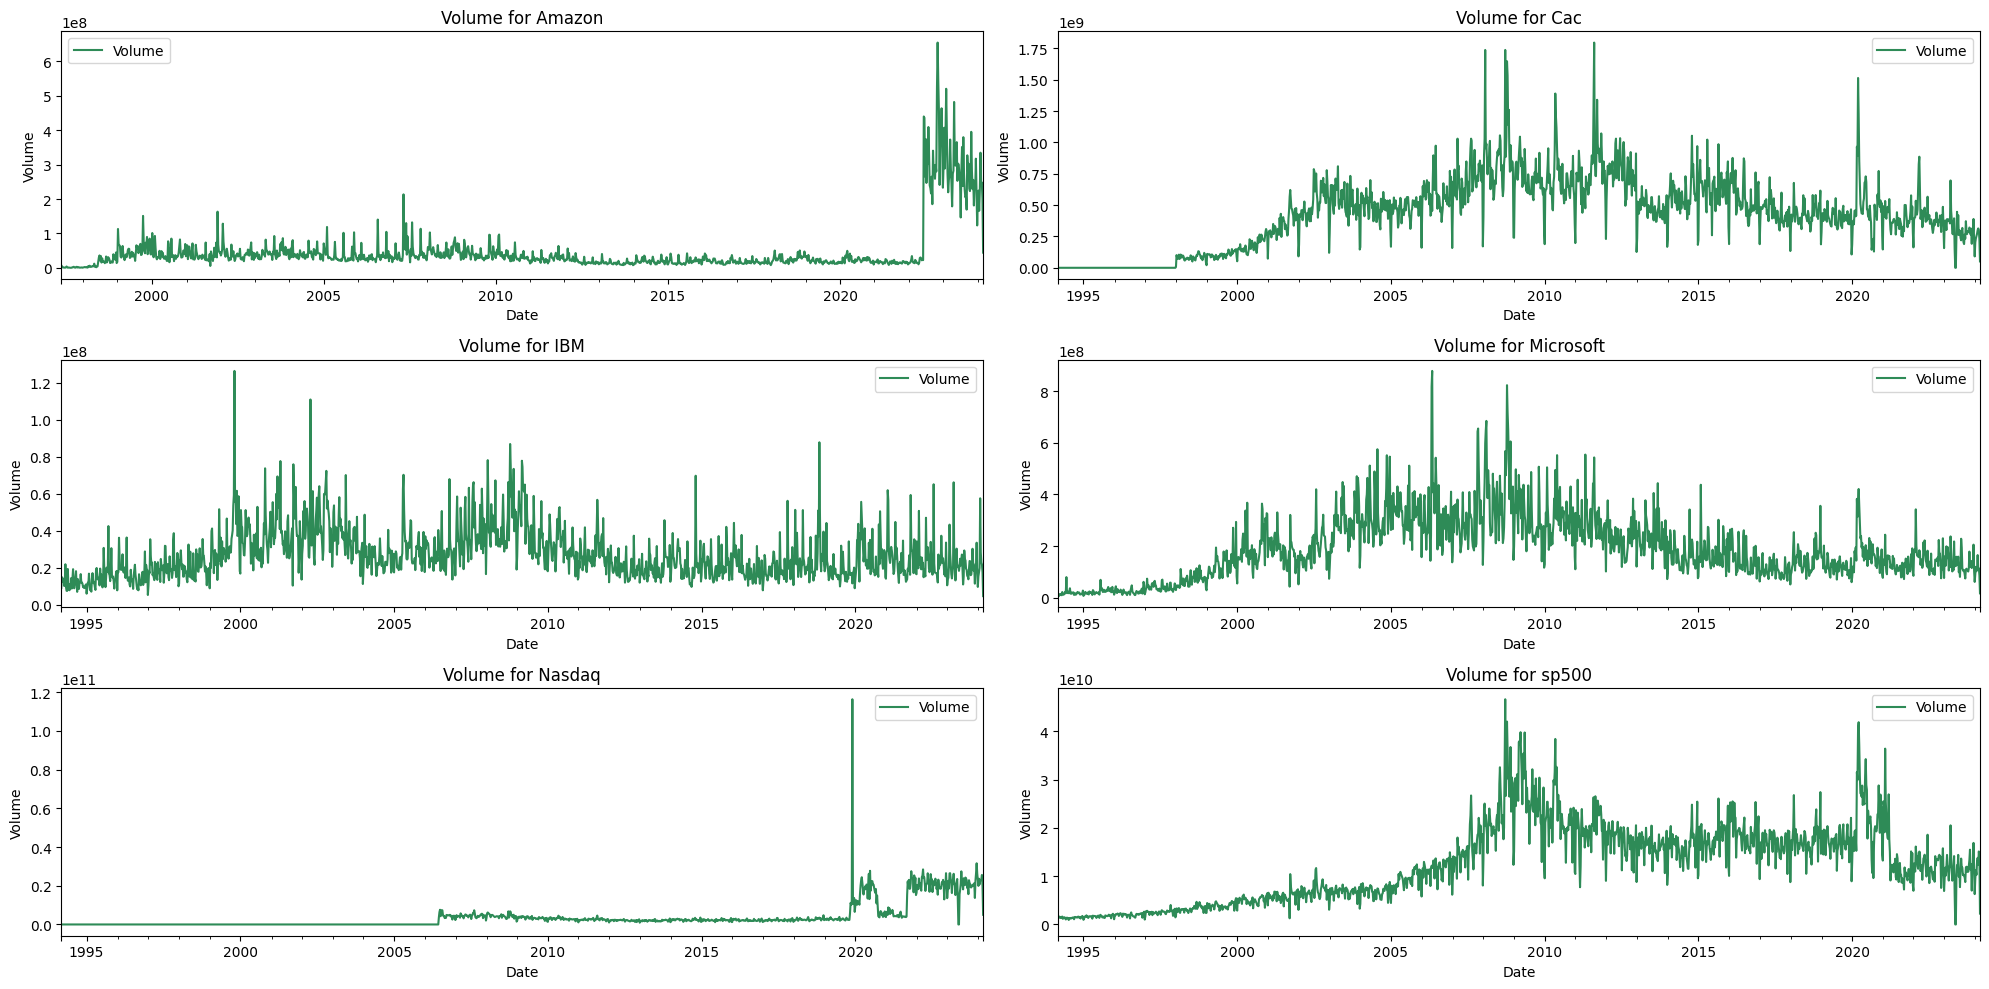

In [4]:
#volumes
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')

plt.tight_layout()
plt.show()

In [6]:
#adjust the volume outlier for nasdaq
nasdaq_df.loc[nasdaq_df['Volume']==nasdaq_df.Volume.max(),'Volume'] = 11634422000

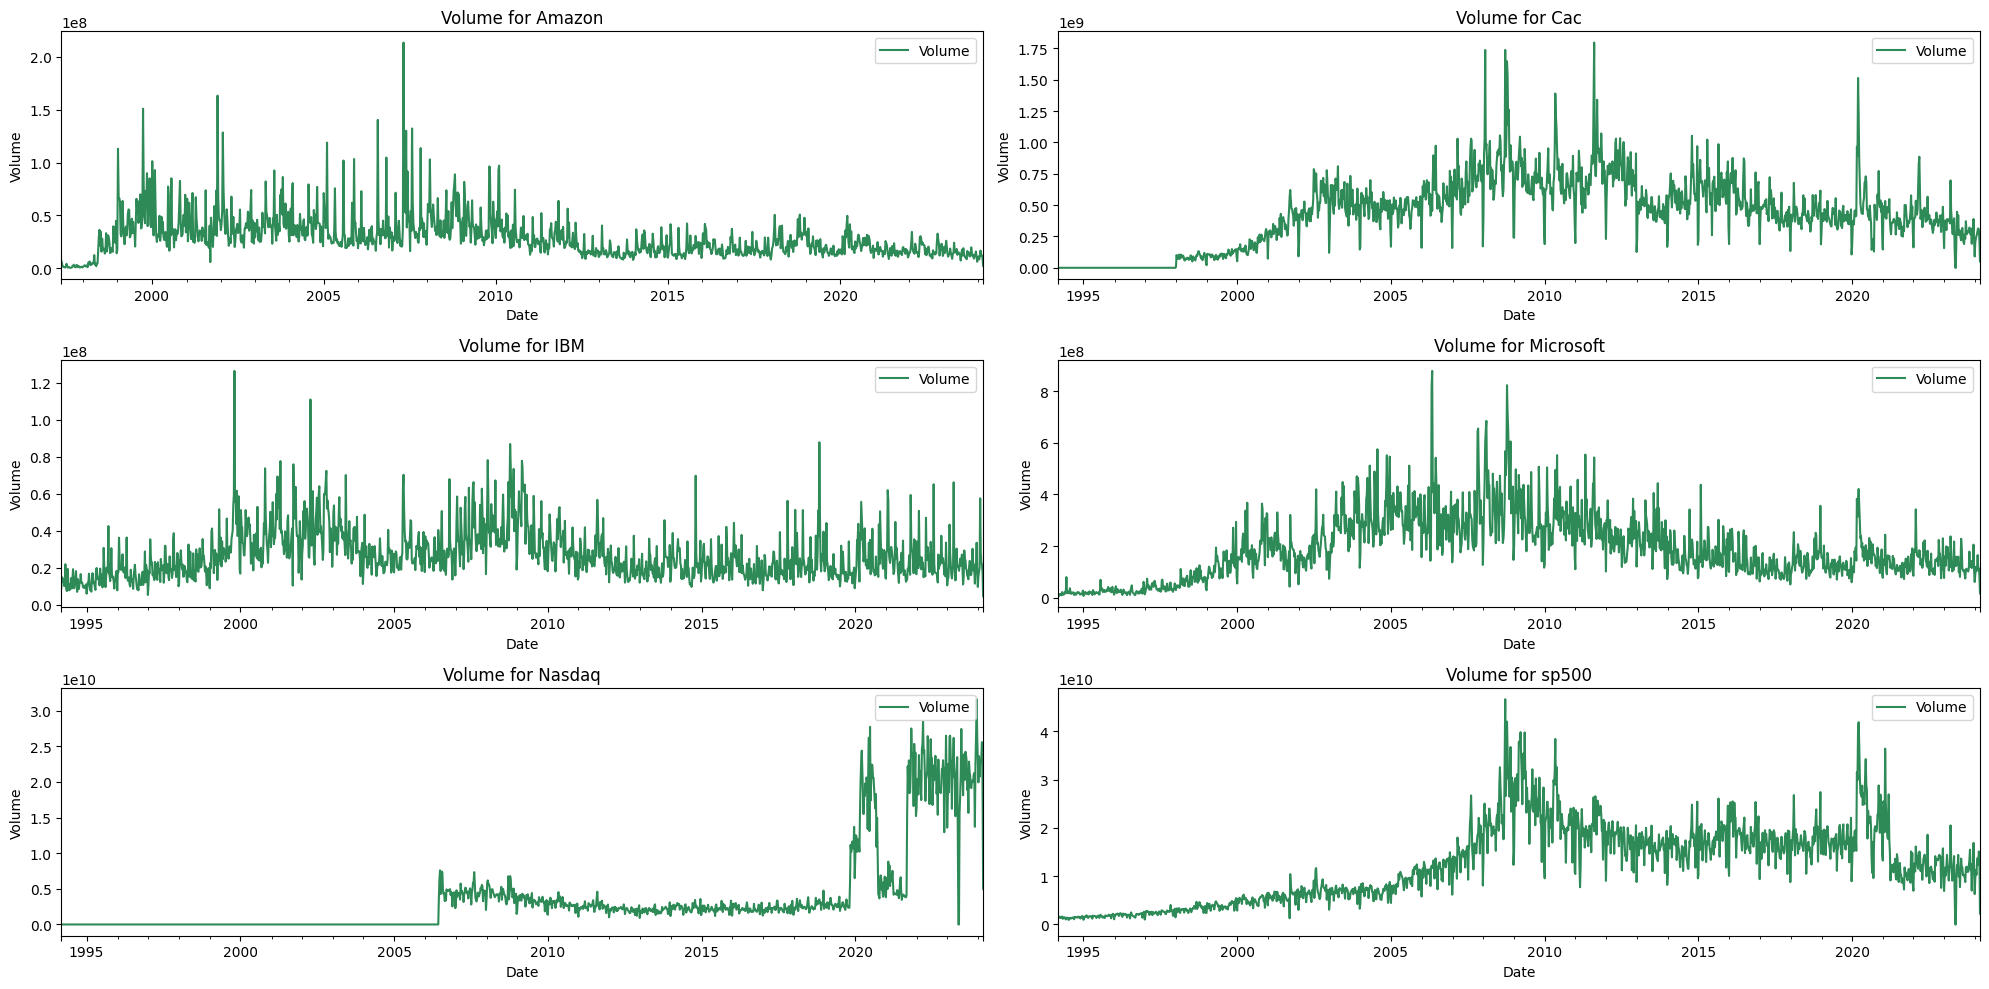

In [7]:
#volumes
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')

plt.tight_layout()
plt.show()

In [8]:
#volume of nasdaq is not zero only from June 2006 on
nasdaq_df[nasdaq_df.Volume !=0].head()

Date     Open     High      Low    Close      Volume
641 2006-06-18  2137.47  2147.91  2065.11  2129.95  3590464523
642 2006-06-25  2136.60  2152.56  2103.77  2121.47  6356132033
643 2006-07-02  2126.46  2183.48  2090.78  2172.09  7589173242
644 2006-07-09  2177.91  2190.44  2126.64  2130.06  4263156577
645 2006-07-16  2135.96  2142.36  2027.11  2037.35  6692935710

In [9]:
#volume of cac is not zero only from January 1998 on
cac_df[cac_df.Volume !=0].head()

Date     Open     High      Low    Close       Volume
200 1998-01-04  2888.63  3048.00  2888.63  3040.14    6752690.0
201 1998-01-11  3023.43  3075.30  2902.13  2919.81  101046353.0
202 1998-01-18  2830.97  2976.85  2809.73  2976.09   78855452.0
203 1998-01-25  3004.86  3016.81  2944.29  2966.15   71560128.0
204 1998-02-01  2992.54  3173.98  2961.90  3172.14   86885992.0

Problem with Volumes:
- for nasdaq, it's 0 before 2006.
- for caa, it's 0 before 1998

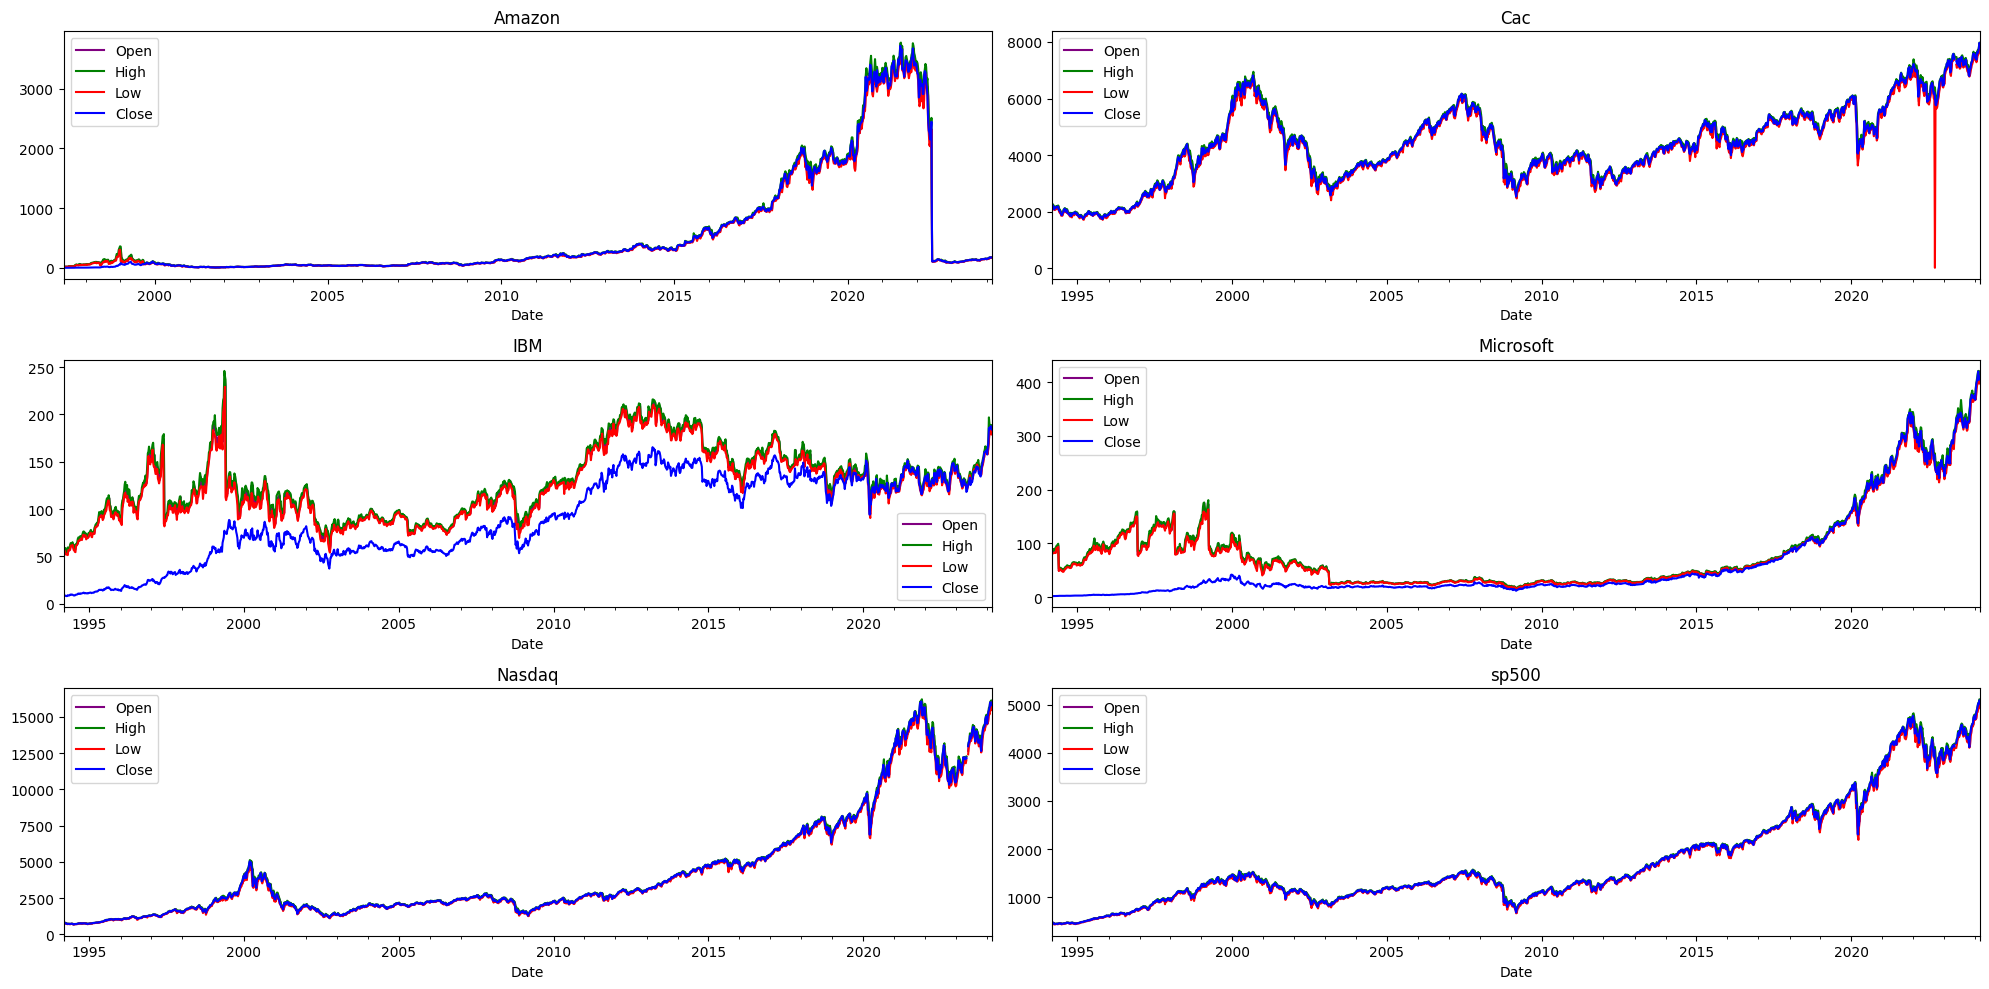

In [10]:
#prices: open, high, close, low BEFORE preprocessing
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

- Cac: on 2022-09-18 we had a problem with the 'Low'. We replace it from Yahoo finance.

In [8]:
#replacing the value for the lowest (nonsense) value for Cac on 2022-09-18
cac_df.loc[cac_df['Low']==cac_df['Low'].min(), 'Low'] = 6052.42

In [12]:
#fillna cac
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 7354.54
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 7523.56
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 7491.96
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 7443.38

cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] = 7197.40
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 7493.38
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 7319.18
cac_df.loc[cac_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 7467.93

In [13]:
#fillna nasdaq
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 12174.06
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 12364.65
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 12284.74
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 12231.68

nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] = 12263.35
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 12731.73
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 12657.90
nasdaq_df.loc[nasdaq_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 12301.17

In [15]:
#fillna sp500
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 4109.86
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 4212.91
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 4191.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 4126.65

sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] =4103.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 4212.87
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 4205.45
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 4190.78

Amazon splits:
- 1998-06-02 2:1
- 1999-01-05 3:1
- 1999-09-05 2:1
- 2022-06-06 20:1

In [26]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1399 non-null   datetime64[ns]
 1   Open    1399 non-null   float64       
 2   High    1399 non-null   float64       
 3   Low     1399 non-null   float64       
 4   Close   1399 non-null   float64       
 5   Volume  1399 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 65.7 KB


In [81]:
amazon_df[(amazon_df['Date']<=pd.to_datetime('2022-06-14')) & (amazon_df['Date']>=pd.to_datetime('2022-05-28'))]

Date       Open     High      Low      Close     Volume
1306 2022-05-29  2169.2200  2303.74  2025.20  2302.9299   24434341
1307 2022-06-05  2325.6001  2512.20  2313.50  2447.0000   22763868
1308 2022-06-12   125.2450   128.99   109.05   109.6500  439648156

In [86]:
# adjust all past prices for the 2022-06-06 split
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('2022-06-06'),['Open', 'High', 'Low', 'Close']]=amazon_df.loc[amazon_df['Date']<=pd.to_datetime('2022-06-06'),['Open', 'High', 'Low', 'Close']]/20

# adjust problematic section where low is higher than close
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-08-29'),['Open', 'High', 'Low']]=amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-08-29'),['Open', 'High', 'Low']]/2
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-01-03'),['Open', 'High', 'Low']]=amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-01-03'),['Open', 'High', 'Low']]/3
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1998-05-31'),['Open', 'High', 'Low']]=amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1998-05-31'),['Open', 'High', 'Low']]/2

# adjust the volume before 2022-06-06 split
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('2022-06-06'),'Volume'] = amazon_df.loc[amazon_df['Date']<=pd.to_datetime('2022-06-06'),'Volume']*20

# assuming volumes were also incorrect for the periods where Open, High and Low were adjusted, we also adjust volumes
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-08-29'),'Volume'] = amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-08-29'),'Volume']*2
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-01-03'),'Volume'] = amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1999-01-03'),'Volume']*3
amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1998-05-31'),'Volume'] = amazon_df.loc[amazon_df['Date']<=pd.to_datetime('1998-05-31'),'Volume']*2

In [87]:
amazon_df[amazon_df['Close']<amazon_df['Low']]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [89]:
amazon_df[amazon_df['Close']>amazon_df['High']]
# This is fine, in 1999-08-15 close and high were exactly the same, this comes down to rounding

Date      Open      High       Low    Close      Volume
29  1997-12-07  0.211979  0.229688  0.206771  0.22969   212712000
117 1999-08-15  2.287500  2.435938  2.050000  2.43594  1716340000

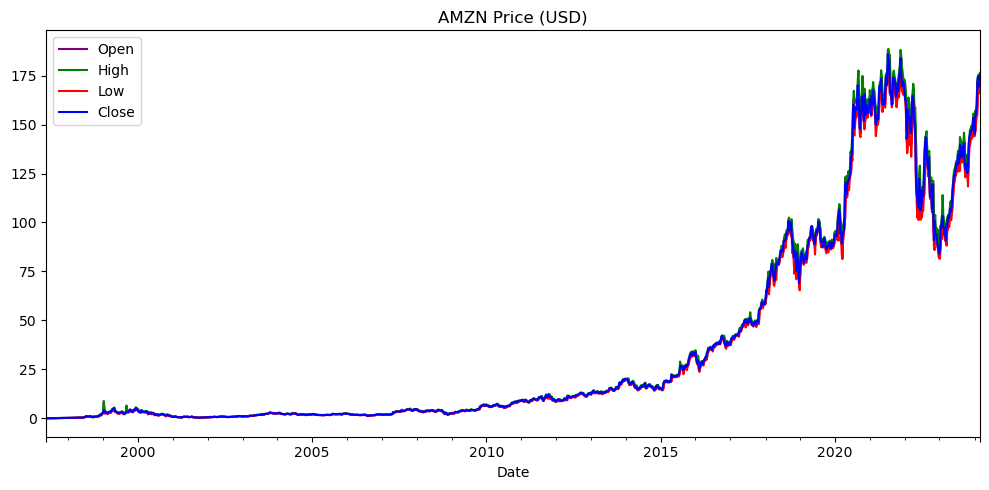

In [92]:
fig,ax=plt.subplots(figsize=(10,5))

amazon_df.plot(x='Date', y='Open', ax=ax, color = 'purple')
amazon_df.plot(x='Date', y='High', ax=ax, color = 'green')
amazon_df.plot(x='Date', y='Low', ax=ax, color = 'red')
amazon_df.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('AMZN Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

All good with Amazon now.

IBM stock splits:
- 1964-05-18 2:1
- 1966-05-18 2:1
- 1968-05-23 2:1
- 1973-05-29 5:4
- 1979-05-21 4:1
- 1997-05-28 2:1
- 1999-05-27 2:1
- 2021-11-04 1046:1000


In [95]:
ibm_df

Date     Open     High      Low     Close    Volume
0    1994-03-06   53.125   53.875   52.125    8.0537   9055900
1    1994-03-13   53.000   56.250   51.375    8.5512  14884100
2    1994-03-20   56.125   58.375   55.875    8.7424  12402200
3    1994-03-27   56.875   58.875   53.625    8.2642  12237600
4    1994-04-03   54.375   55.000   52.000    8.3599  14114100
...         ...      ...      ...      ...       ...       ...
1561 2024-02-04  187.460  189.460  182.710  184.1115  28282700
1562 2024-02-11  185.510  187.180  181.490  186.3400  22784812
1563 2024-02-18  185.900  188.950  182.260  187.6400  21745006
1564 2024-02-25  187.640  188.770  178.750  185.7200  17487852
1565 2024-03-03  185.600  186.125  184.060  184.1300   4620815

[1566 rows x 6 columns]

In [125]:
ibm_df_subset=ibm_df[ibm_df['Close']<ibm_df['Low']]
ibm_df_subset

Date     Open     High      Low     Close    Volume
0    1994-03-06   53.125   53.875   52.125    8.0537   9055900
1    1994-03-13   53.000   56.250   51.375    8.5512  14884100
2    1994-03-20   56.125   58.375   55.875    8.7424  12402200
3    1994-03-27   56.875   58.875   53.625    8.2642  12237600
4    1994-04-03   54.375   55.000   52.000    8.3599  14114100
...         ...      ...      ...      ...       ...       ...
1543 2023-10-01  146.570  147.430  139.610  137.4734  23445500
1544 2023-10-08  140.040  142.940  139.860  139.1685  15932300
1545 2023-10-15  142.300  143.420  138.270  135.6704  16385600
1546 2023-10-22  139.280  140.620  136.310  134.3966  21043800
1557 2024-01-07  162.830  163.290  158.670  157.7221  15322500

[1370 rows x 6 columns]

In [120]:
ibm_df[(ibm_df['Date']>pd.to_datetime('1999-05-01')) & (ibm_df['Date']<pd.to_datetime('1999-06-27'))]

Date      Open      High       Low    Close    Volume
269 1999-05-02  204.7500  215.2500  202.3125  67.3741  35623600
270 1999-05-09  208.0000  217.5000  206.3125  70.0107  23481700
271 1999-05-16  217.2500  246.0000  215.5000  77.1004  36196600
272 1999-05-23  236.0000  240.6250  229.1875  74.2403  20666100
273 1999-05-30  230.3125  236.6250  112.6250  74.7641  34247700
274 1999-06-06  113.6250  116.0000  109.4375  74.7641  24534900
275 1999-06-13  118.1250  121.6875  112.5625  73.6765  28775600
276 1999-06-20  115.8750  122.0000  114.0000  77.8256  30580200

In [121]:
ibm_df[(ibm_df['Date']>pd.to_datetime('1997-05-01')) & (ibm_df['Date']<pd.to_datetime('1997-06-28'))]

Date     Open      High      Low    Close    Volume
165 1997-05-04  149.625  162.8750  149.125  25.7292  17726600
166 1997-05-11  162.875  169.2500  162.125  26.6465  16971200
167 1997-05-18  168.250  177.1250  168.125  27.0445  19115900
168 1997-05-25  169.875  177.3750  166.875  27.5817  12263000
169 1997-06-01  174.000  179.2500   84.500  27.5216  24707700
170 1997-06-08   87.750   87.8750   81.750  27.2437  21034800
171 1997-06-15   86.000   89.7500   85.500  28.3172  18614500
172 1997-06-22   88.750   91.9375   88.250  28.5957  19400900

In [96]:
ibm_df[(ibm_df['Date']>pd.to_datetime('2023-12-20')) & (ibm_df['Date']<pd.to_datetime('2024-01-20'))]

Date    Open    High     Low     Close    Volume
1555 2023-12-24  162.23  163.33  159.53  160.6751  17732400
1556 2023-12-31  162.23  164.18  162.05  162.0724   9603900
1557 2024-01-07  162.83  163.29  158.67  157.7221  15322500
1558 2024-01-14  158.69  165.98  157.89  164.3021  17641300

In [126]:
ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('2021-11-04'),['Open', 'High', 'Low']]=ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('2021-11-04'),['Open', 'High', 'Low']]/1.046

# adjust for the 1999-05-27 split, plus the Open and High at 1999-05-30, which are an anomaly in the dataset
ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1999-05-27'),['Open', 'High', 'Low']]=ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1999-05-27'),['Open', 'High', 'Low']]/2
ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1999-05-30'),['Open', 'High']]=ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1999-05-30'),['Open', 'High']]/2

# adjust for the 1997-05-28 split, plus the Open and High at 1997-06-01, which are an anomaly in the dataset
ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1997-05-28'),['Open', 'High', 'Low']]=ibm_df_subset.loc[ibm_df_subset['Date']<=pd.to_datetime('1997-05-28'),['Open', 'High', 'Low']]/2
ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1997-06-01'),['Open', 'High']]=ibm_df_subset.loc[ibm_df_subset['Date']==pd.to_datetime('1997-06-01'),['Open', 'High']]/2

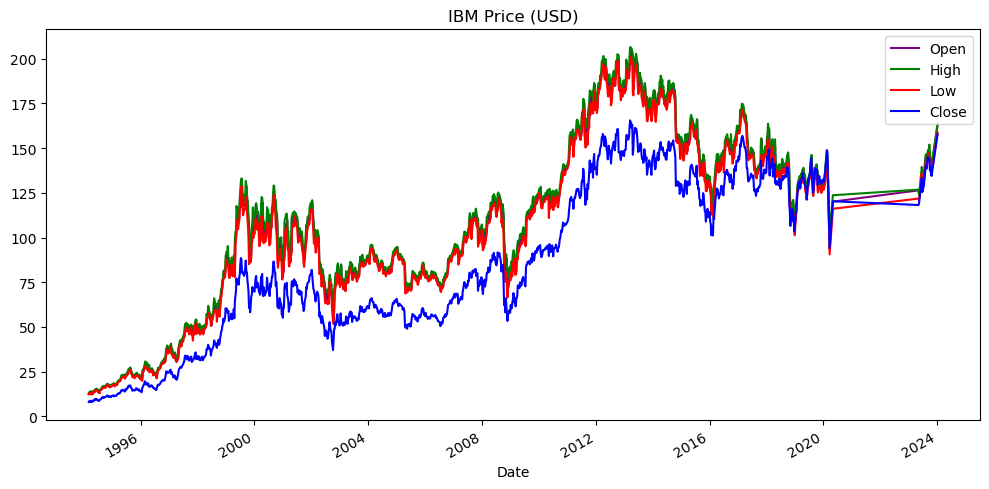

In [127]:
fig,ax=plt.subplots(figsize=(10,5))

ibm_df_subset.plot(x='Date', y='Open', ax=ax, color = 'purple')
ibm_df_subset.plot(x='Date', y='High', ax=ax, color = 'green')
ibm_df_subset.plot(x='Date', y='Low', ax=ax, color = 'red')
ibm_df_subset.plot(x='Date', y='Close', ax=ax, color = 'blue')
ax.set_title('IBM Price (USD)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.show()

In [ ]:
# The close price on 2024-01-14 is wrong, according to tradingview it is 159.16 USD


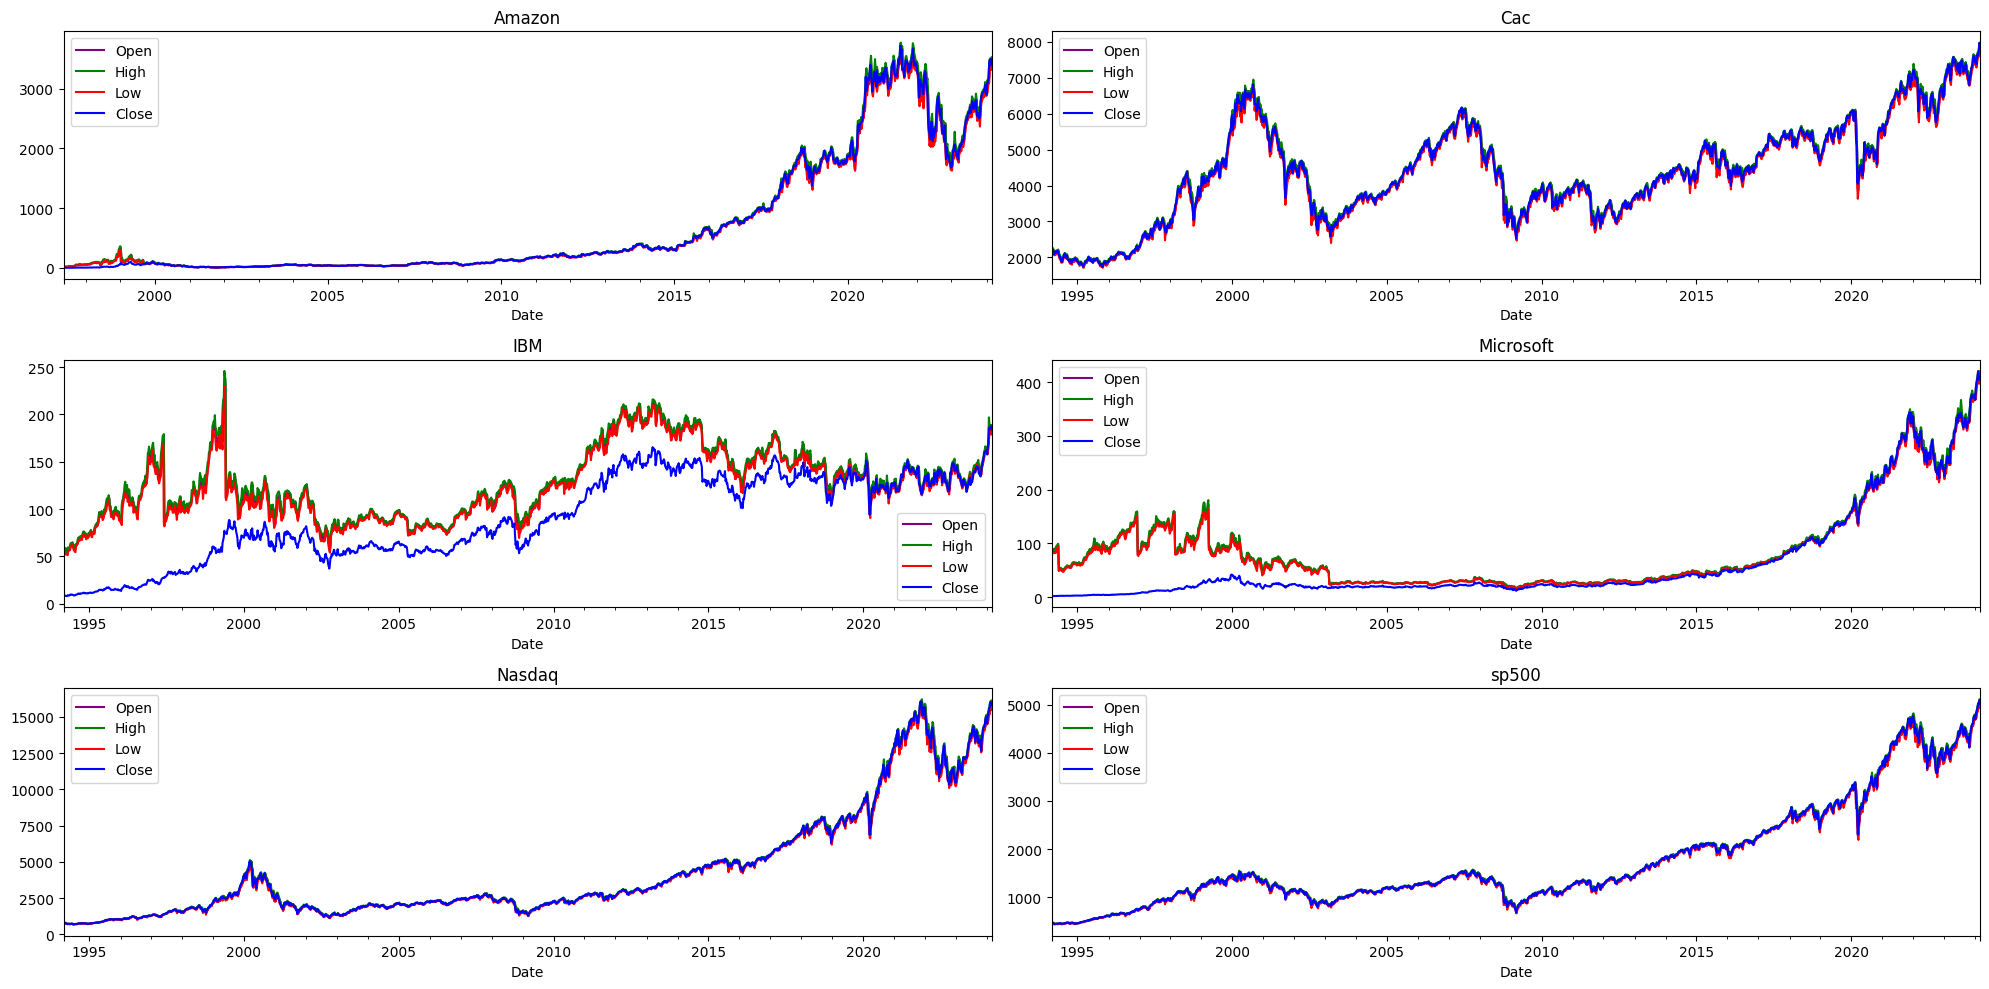

In [19]:
#prices AFTER the cleaning of the Close prices
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [20]:
#investigate missing values for the datasets
for name, df in zip(dfs_names, dfs):
    missing_rows = df[df.isna().any(axis=1)]
    if not missing_rows.empty:
        print(f"DataFrame: {name}")
        print(missing_rows)

for df in dfs:
    df.dropna(inplace=True)

Close<Low:
- Data recording errors: Errors might have occurred during the process of recording or entering the data, leading to inconsistencies.
- Data adjustments: Sometimes, historical data might be adjusted to account for corporate actions such as stock splits, dividends, or other factors. If not handled properly, these adjustments could lead to inconsistencies.
- Data processing issues: Errors might occur during data processing, such as merging or joining datasets, which could result in incorrect values being assigned.

In [21]:
#cases in which I have that Close<Low:
for df, name in zip(dfs, dfs_names):
    print(name, df[df['Close']<df['Low']])

Amazon           Date      Open      High      Low    Close      Volume
0   1997-05-18   18.0000   30.0000   18.000   1.7292   7238000.0
1   1997-05-25   21.1250   21.2500   15.750   1.5000   4836500.0
2   1997-06-01   18.1250   19.7500   17.500   1.5000   1611600.0
3   1997-06-08   18.1250   20.5000   16.500   1.6563   1527900.0
4   1997-06-15   19.8750   20.5000   18.375   1.5834    943700.0
..         ...       ...       ...      ...      ...         ...
115 1999-08-01  110.4375  115.5000   97.500  50.0313  55493000.0
116 1999-08-08   98.3750  102.1250   82.000  44.7813  63627000.0
117 1999-08-15   91.5000   97.4375   82.000  48.7188  42908500.0
118 1999-08-22   98.2500  117.5000   95.500  56.7188  48701800.0
119 1999-08-29  115.9375  135.5625  115.750  64.2500  48662200.0

[120 rows x 6 columns]
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM            Date     Open     High      Low     Close    Volume
0    1994-03-06   53.125   53.875   52.125  

SUM UP for Close<Low:
- Amazon: we have 120 rows between '97 and '99
- Cac: no case
- IBM: 1370 cases from 1994 to 2024
- Microsoft: 1285 cases from 1994 to 2023
- Nasdaq: no case
- sp500: no case

In [22]:
#Check for duplicates
for df, name in zip(dfs, dfs_names):
    duplicates = df[df.duplicated()]
    print(name, duplicates)

Amazon Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Microsoft Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Nasdaq Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
sp500 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


Outliers?

## PREPROCESSING

In [23]:
from sklearn.preprocessing import StandardScaler

#scaler
scaler = StandardScaler()

#standardization of the prices
for df in dfs:
    df[['Close', 'Open', 'Low', 'High']] = scaler.fit_transform(df[['Close', 'Open', 'Low', 'High']])

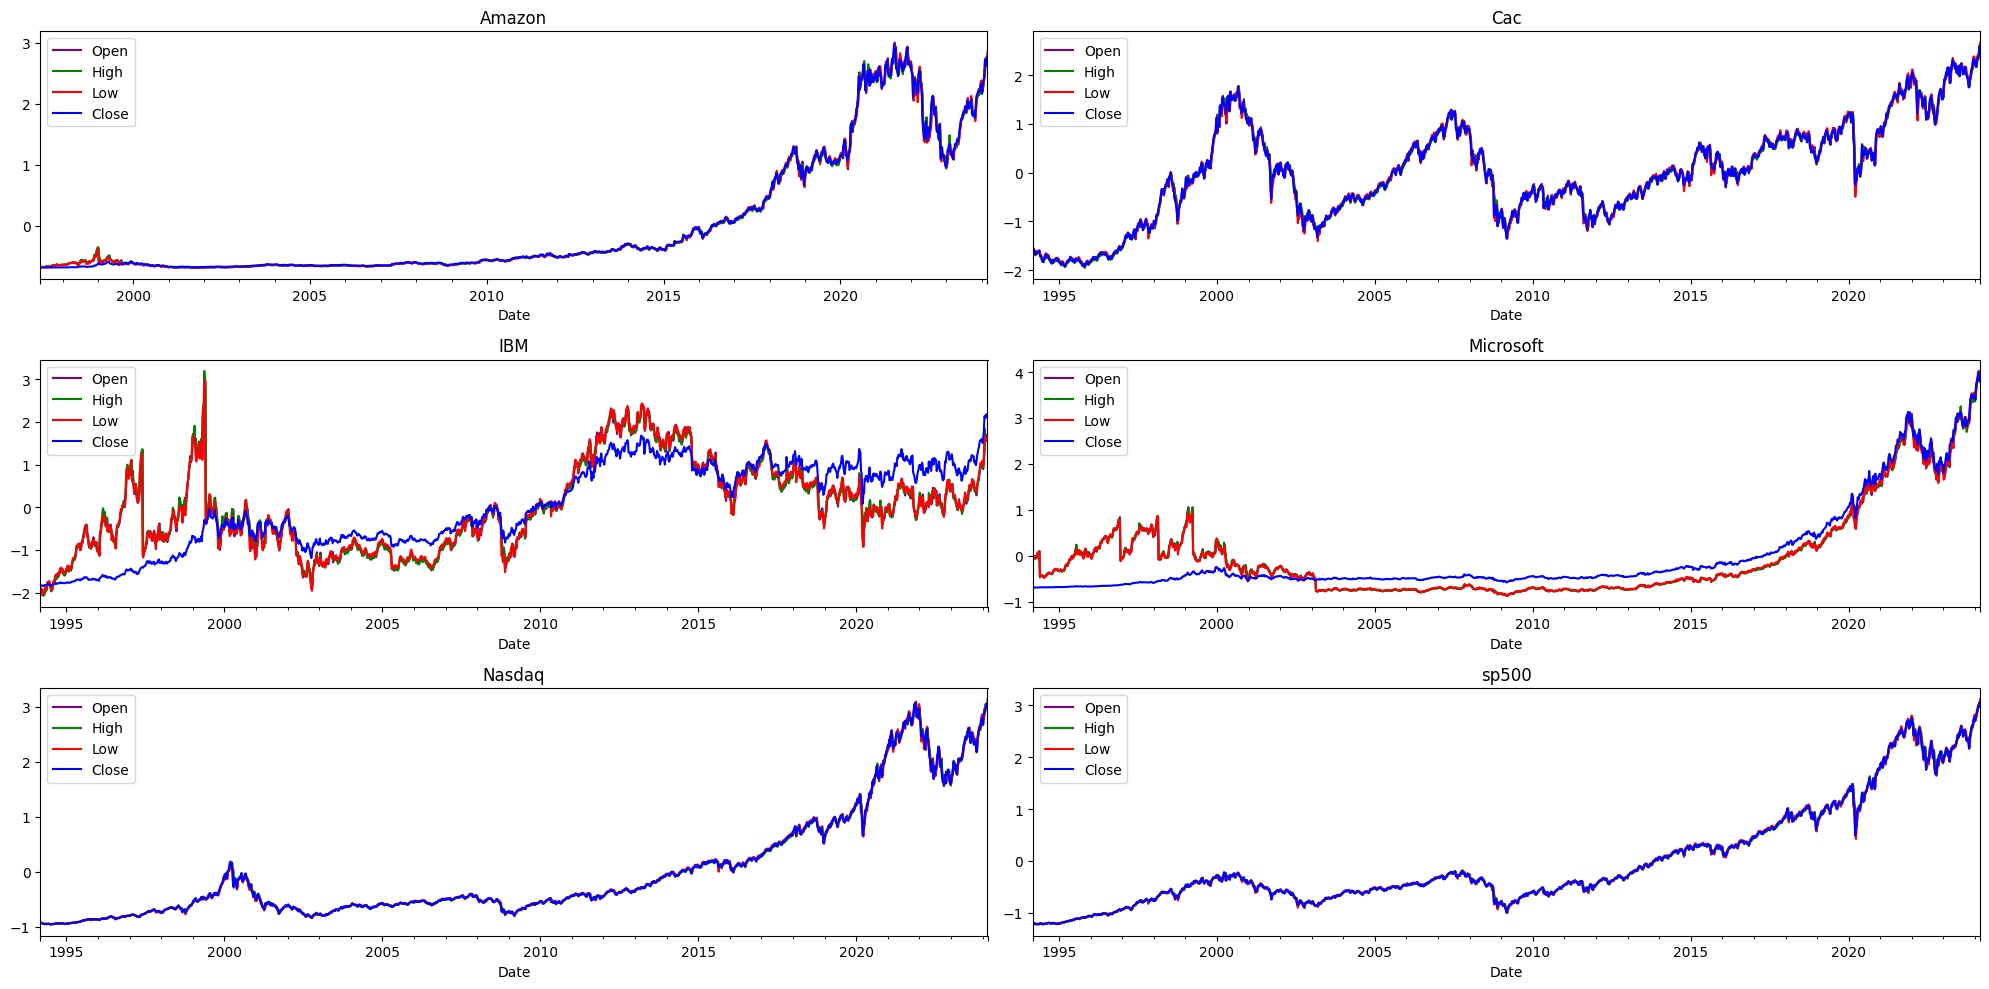

In [24]:
#plots with standardized prices
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler

#scaler
scaler = MinMaxScaler()

#standardization of the prices
for df in dfs:
    df.loc[df['Volume']>0, ['Volume']] = scaler.fit_transform(df.loc[df['Volume']>0, ['Volume']])

#question: is it better to use RobustScaler to transform the volume? Take a look at it and try whether the performance is then getting better.

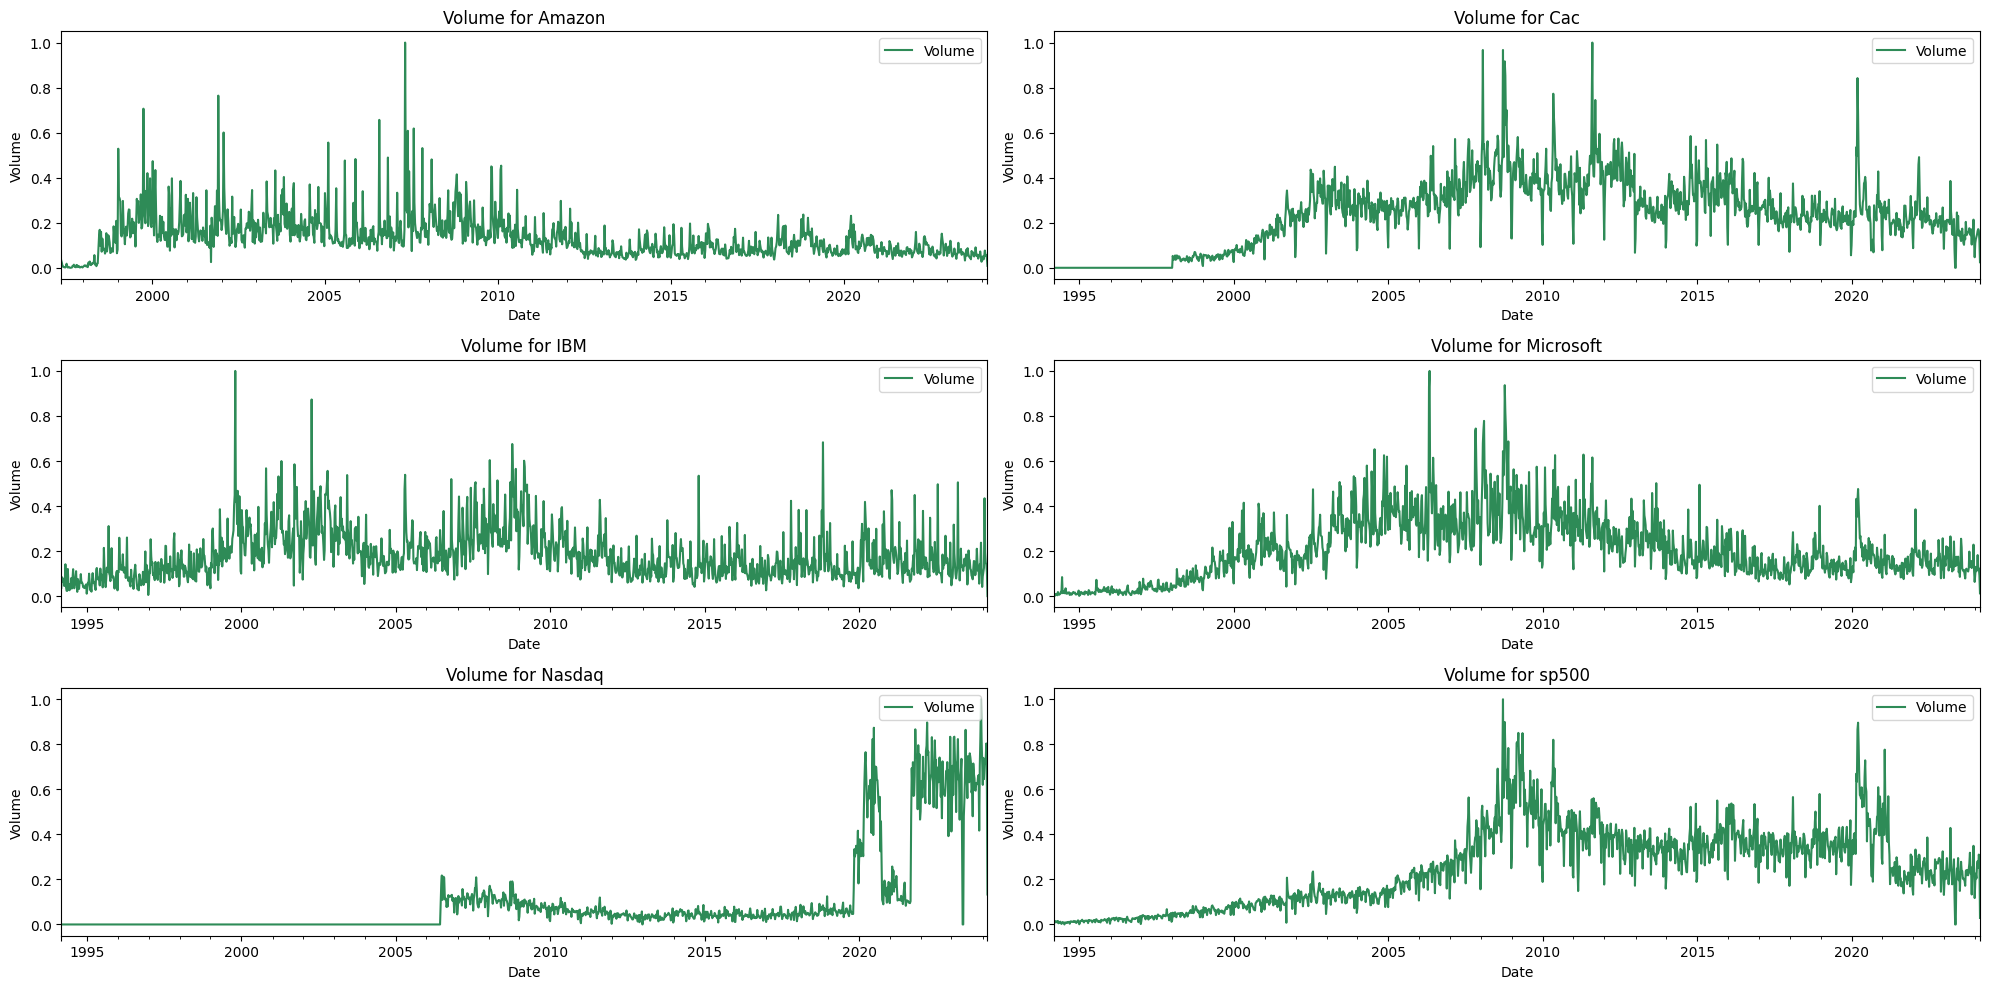

In [26]:
#volume after the scaling
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')
plt.tight_layout()
plt.show()

## ARIMA

- _AR(p) and MA(q)_

AR(p) and MA(q): these two methods are used to check how the stationarity is dependent on past errors or on past data respectively. In both case, the dependence is considered to be in additive way. The names clarify the two approaches: Moving Average and Autoregression; q is the number of the past errors the future data is depending upon, while p is the same but which past data.

- _ACF plots and ACF function_

Precondition: both ACF and PACF assume stationarity of the underlyinh time series.
Autocorrelation: correlation between a time series with a lagged version of itself. The ACF starts with a lag at 0, which is the correlation of the time series with itself t(therefore results in a correlation of 1).

https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c#:~:text=in%20your%20browser.-,Autocorrelation%20Function%20(ACF),plot_acf%20function%20from%20the%20statsmodels.

Autocorrelation analysis helps detect pattern and check for randomness. It's very important when using ARMA model because it backs the finding of the parameters. ACF is giving you similarity, so it doesn't provide you any insight for a good estimation of p.
But, ACF is useful when it comes to work with MA(q). The ACF plot can tell things like the observed time series is white noise/random.
So, we have to move to PACF for p, which is a conditional correlation.The order is the dirrefence between the indexes of times (e.g.: it's 2 for t_1, t_3). If you calculate the PACF function of AR(p), it will be 0 after time lag = p. The cutting off of PACF(h) after p lags is the AR’s signature (p) model.

!!check parameter method = 'ols'

- _ARMa(p,q)_

It's a combination of the two model, and it's used to model stationary nonseasonal time series data. To select the best model, we compute the BIC for all the three and select the one which has the lowest value. To get the best parameters, we should compute AIC or BIC over a subset of p,q.

- _ARIMA(d,p,q)_

Change data into stationary data by transformation and differencing. (I)
Apply AR and MA models to estimate the dependence structure of the differenced time series and predict.
That’s AR + I + MA = ARIMA for you.

- _lollipop plots_

The blue area you see in ACF and PACF plots is the confidence interval and is an indicator of the significance threshold. TO DETERMINE THE ORDER OF THE MODEL: how many lollipopos are above/below the confidence interval before the next lollipop enters the blue area?


In [27]:
# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26):
    short_ema = data['Close'].ewm(span=short_window, min_periods=1).mean()
    long_ema = data['Close'].ewm(span=long_window, min_periods=1).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, min_periods=1).mean()
    return macd, signal_line

In [28]:
for df in dfs:
    # Calculate moving averages (e.g., 10-day and 50-day)
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA40'] = df['Close'].rolling(window=40).mean()
    df['MACD'], df['Signal_Line'] = calculate_macd(df)
    df['RSI'] = calculate_rsi(df)

In [29]:
#Augmented Dickey-Fuller (ADF) test on each time series provided in the dfs list.
#The ADF test is a statistical test used to determine whether a unit root is present in a time series dataset.
#A unit root indicates that the series is non-stationary, meaning it has a trend or seasonality that needs to be removed for accurate analysis.

from statsmodels.tsa.stattools import adfuller

#  Define a function adf_check that takes a time series as input and performs the ADF test on it.
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Number of Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        #Checks if the p-value from the ADF test is less than or equal to 0.05, which is a common significance level.
        #If so, it indicates evidence against the null hypothesis of a unit root being present.
        print(f"Reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        #If the p-value is greater than 0.05, the null hypothesis cannot be rejected.
        print(f"Fail to reject the null hypothesis. Time series has a unit root, indicating it is non-stationary.")

In [30]:
#check: close and volume don't have inf values
for df in dfs:
    inf_close = np.isinf(df['Close']).any()
    inf_volume = np.isinf(df['Volume']).any()
    print(inf_close, inf_volume)

False False
False False
False False
False False
False False
False False


In [31]:
#check: close and volume don't have nan
for df in dfs:
    nan_close = (df['Close']).isna().sum()
    nan_volume = (df['Volume']).isna().sum()
    print(nan_close, nan_volume)


0 0
0 0
0 0
0 0
0 0
0 0


Reference for parameters selection:
https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

In [32]:
#split train and test
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go
from pandas import DateOffset
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot

The ARIMA model aims to capture the temporal dependencies and patterns in the time series data, making it suitable for forecasting future values.

Working Principles:
- Identifying Stationarity: ARIMA models require the time series data to be stationary. Stationarity implies that the statistical properties of the time series (like mean and variance) remain constant over time.
- Parameter Estimation: Estimating the parameters p, d, and q involves analyzing the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots of the time series data. ACF helps determine the MA order (q), while PACF aids in determining the AR order (p).
- Model Fitting: Once the parameters are determined, the ARIMA model is fitted to the data. This involves minimizing the error (often using methods like maximum likelihood estimation) to obtain the most suitable coefficients for the autoregressive and moving average terms.
- Forecasting: After fitting the model, it can be used to forecast future values by iterating over time.

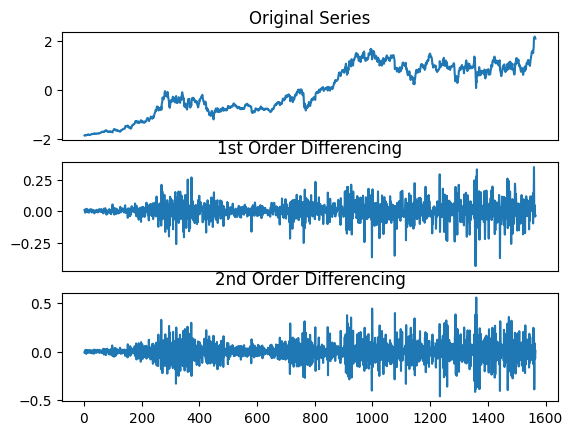

In [33]:
#selection of d parameter for IBM
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(ibm_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(ibm_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(ibm_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

In [34]:
#correzione esponenziale di ibm con il logaritmo
ibm_df['Log Close'] = np.log(ibm_df['Close']+2)

ibm_df['Log Close First Difference'] = ibm_df['Log Close']- ibm_df['Log Close'].shift(1)
adf_check(ibm_df['Log Close First Difference'].dropna())

ibm_df['Log Close Second Difference'] = ibm_df['Log Close First Difference']- ibm_df['Log Close First Difference'].shift(1)
adf_check(ibm_df['Log Close Second Difference'].dropna())

ibm_df['Log Seasonal Difference'] = ibm_df['Log Close'] - ibm_df['Log Close'].shift(52)
adf_check(ibm_df['Log Seasonal Difference'].dropna())

ibm_df['Seasonal First Difference'] = ibm_df['Log Close First Difference'] - ibm_df['Log Close First Difference'].shift(54)
adf_check(ibm_df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -19.40464320435571
p-value : 0.0
#Number of Lags Used : 4
Number of Observations Used : 1560
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.582122914456862
p-value : 4.45116983336071e-27
#Number of Lags Used : 22
Number of Observations Used : 1541
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.0129866769543945
p-value : 0.0013440152089552666
#Number of Lags Used : 19
Number of Observations Used : 1494
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -11.120347941767829
p-value : 3.4785533473702665e-20
#Number of Lags Used : 18
Number of Observations Used : 1492
Reject the null hypothesis. Data has no unit root and is stationary.


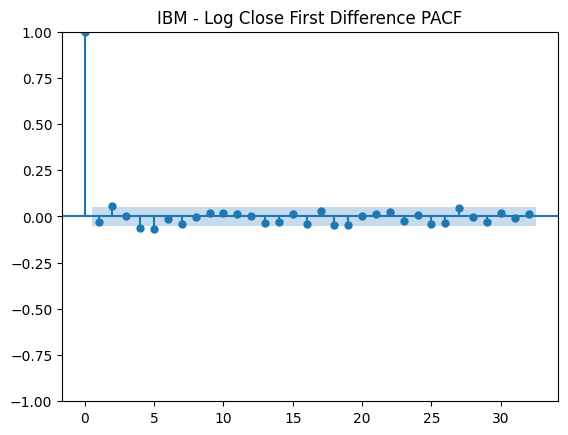

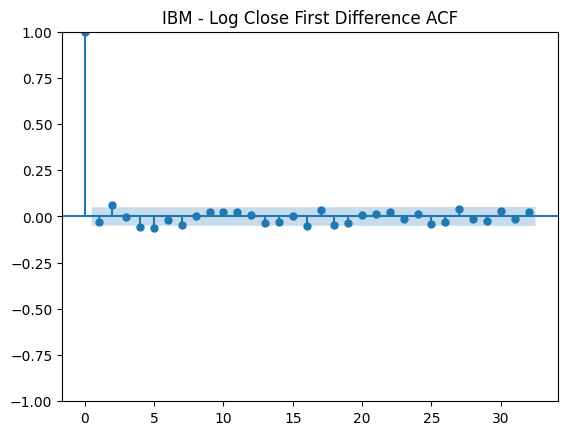

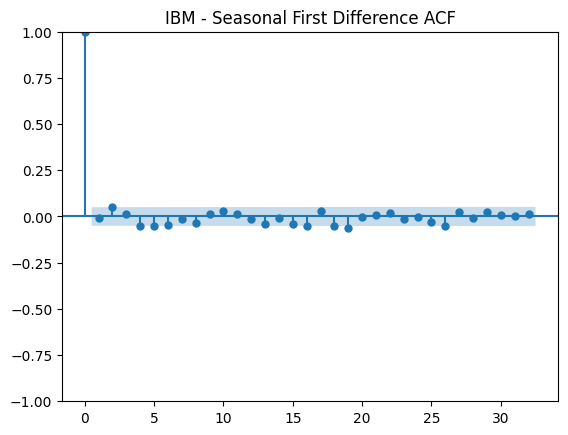

In [35]:
#selection of p and q for IBM
fig_first = plot_pacf(ibm_df['Log Close First Difference'].dropna(), title='IBM - Log Close First Difference PACF')
second_first = plot_acf(ibm_df['Log Close First Difference'].dropna(), title='IBM - Log Close First Difference ACF')

    # Seasonal First Difference
fig_seasonal_first = plot_acf(ibm_df["Seasonal First Difference"].dropna(), title='IBM - Seasonal First Difference ACF')


In [36]:
train_size_ibm = int(len(ibm_df) * 0.8)  # 80% for training
ibm_train, ibm_test = ibm_df[:train_size_ibm], ibm_df[train_size_ibm:]
ibm_test.set_index('Date', inplace=True)
ibm_train.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Log Close   No. Observations:                 1252
Model:                 ARIMA(2, 2, 1)   Log Likelihood                2306.666
Date:                Fri, 12 Apr 2024   AIC                          -4605.333
Time:                        07:46:23   BIC                          -4584.809
Sample:                    03-06-1994   HQIC                         -4597.617
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0425      0.024     -1.809      0.070      -0.089       0.004
ar.L2          0.0465      0.024      1.931      0.053      -0.001       0.094
ma.L1         -0.9965      0.003   -321.115      0.0

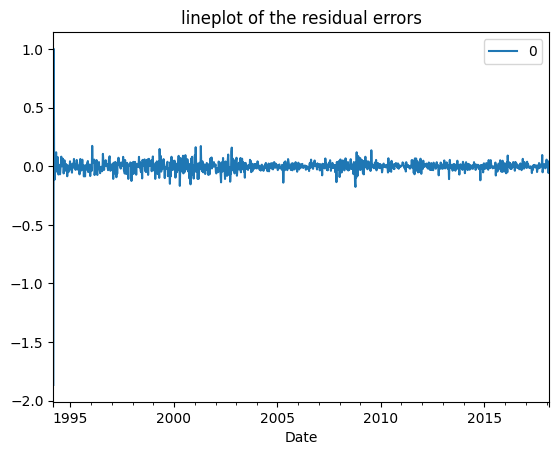

                 0
count  1252.000000
mean     -0.002345
std       0.071034
min      -1.866031
25%      -0.019882
50%      -0.000079
75%       0.017991
max       1.002528


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-37-11e930f79c84>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibm_test['forecast'] = fc


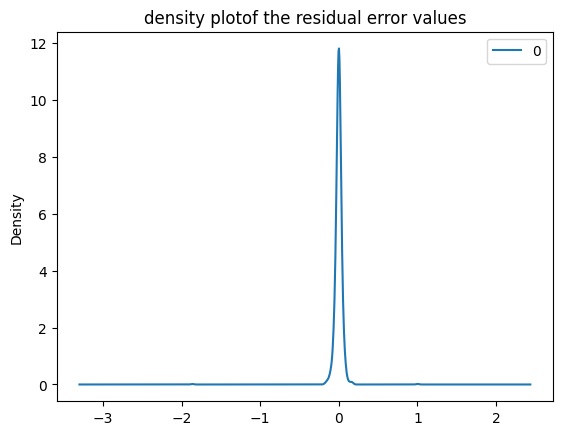

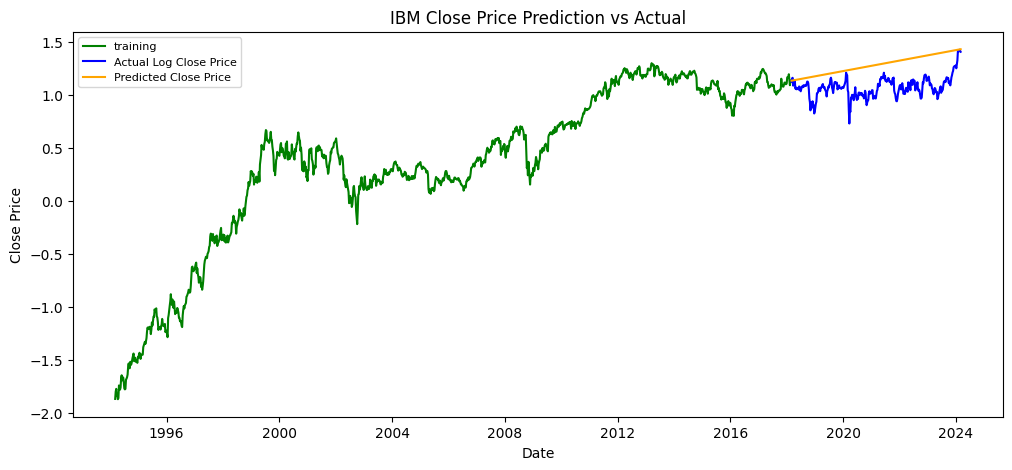

MSE: 0.05426096338900288
MAE: 0.05426096338900288
RMSE: 0.23293982782899725
MAPE: 0.20258230604998562


In [37]:
#IBM
model = ARIMA(ibm_train['Log Close'], order=(2,2,1))
results = model.fit()
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() # suggesting that they still be some trend information not captured by the model?
plt.title('lineplot of the residual errors')
plt.show()
residuals.plot(kind='kde')
plt.title('density plotof the residual error values')
print(residuals.describe())
ibm_test.shape

#forecast
fc = results.forecast(314, alpha=0.05)
ibm_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ibm_train['Log Close'], color='green',label='training')
plt.plot(ibm_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(ibm_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('IBM Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=ibm_test.index, y=ibm_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=ibm_test.index, y=ibm_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for IBM',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(ibm_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(ibm_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(ibm_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-ibm_test['Log Close'])/np.abs(ibm_test['Log Close']))
print('MAPE: '+str(mape))

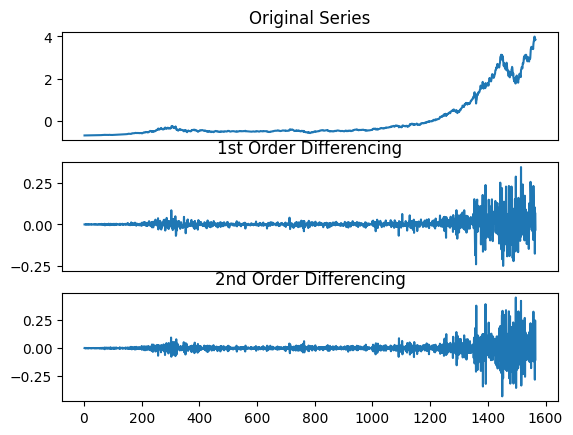

In [38]:
#selection of d parameter for Microsoft
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(microsoft_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(microsoft_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(microsoft_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

In [39]:
#correzione esponenziale di microsoft con il logaritmo
microsoft_df['Log Close'] = np.log(microsoft_df['Close']+1)

microsoft_df['Log Close First Difference'] = microsoft_df['Log Close']- microsoft_df['Log Close'].shift(1)
adf_check(microsoft_df['Log Close First Difference'].dropna())

microsoft_df['Log Close Second Difference'] = microsoft_df['Log Close First Difference']- microsoft_df['Log Close First Difference'].shift(1)
adf_check(microsoft_df['Log Close Second Difference'].dropna())

microsoft_df['Log Seasonal Difference'] = microsoft_df['Log Close'] - microsoft_df['Log Close'].shift(52)
adf_check(microsoft_df['Log Seasonal Difference'].dropna())

microsoft_df['Seasonal First Difference'] = microsoft_df['Log Close First Difference'] - microsoft_df['Log Close First Difference'].shift(54)
adf_check(microsoft_df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -19.607609551714667
p-value : 0.0
#Number of Lags Used : 4
Number of Observations Used : 1560
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.65069881557587
p-value : 3.504297093085465e-27
#Number of Lags Used : 23
Number of Observations Used : 1540
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.5504075396536465
p-value : 0.006783055822138592
#Number of Lags Used : 14
Number of Observations Used : 1499
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -17.971096554079182
p-value : 2.7954984181974146e-30
#Number of Lags Used : 5
Number of Observations Used : 1505
Reject the null hypothesis. Data has no unit root and is stationary.


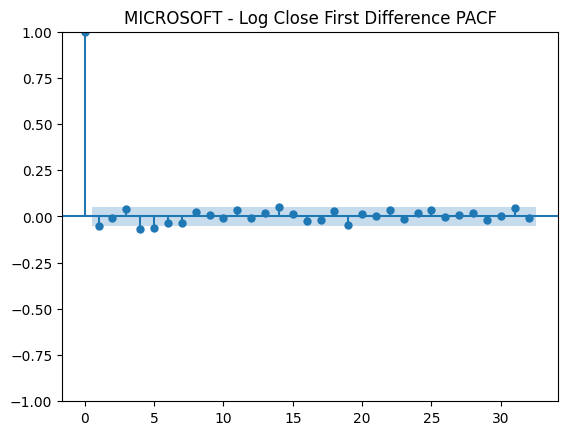

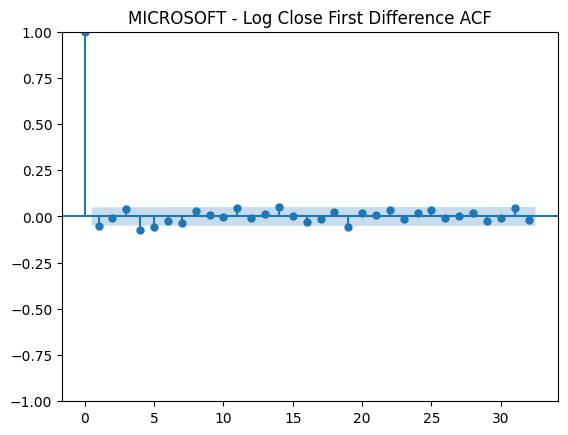

In [40]:
#indagine di p e q per microsoft
fig_first = plot_pacf(microsoft_df['Log Close First Difference'].dropna(), title='MICROSOFT - Log Close First Difference PACF')
second_first = plot_acf(microsoft_df['Log Close First Difference'].dropna(), title='MICROSOFT - Log Close First Difference ACF')
#fig_seasonal_first = plot_acf()

In [41]:
train_size_microsoft = int(len(microsoft_df) * 0.8)
microsoft_train, microsoft_test = microsoft_df[:train_size_microsoft], microsoft_df[train_size_microsoft:]

microsoft_test.set_index('Date', inplace=True)
microsoft_train.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:              Log Close   No. Observations:                 1252
Model:                 ARIMA(1, 2, 1)   Log Likelihood                3196.088
Date:                Fri, 12 Apr 2024   AIC                          -6386.176
Time:                        07:46:30   BIC                          -6370.783
Sample:                    03-06-1994   HQIC                         -6380.389
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0196      0.019     -1.018      0.308      -0.057       0.018
ma.L1         -0.9964      0.004   -251.319      0.000      -1.004      -0.989
sigma2         0.0004   7.35e-06     47.711      0.0

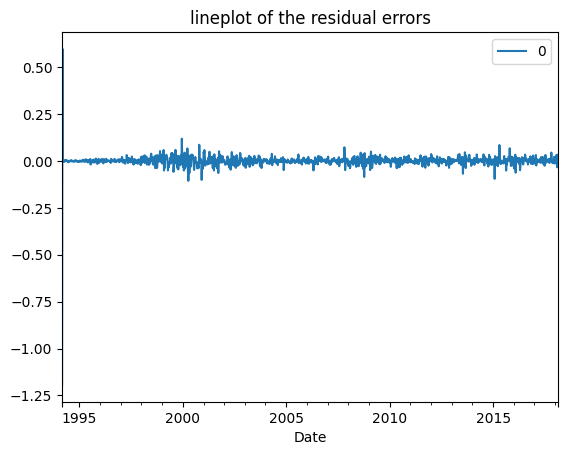

                 0
count  1252.000000
mean     -0.000268
std       0.042131
min      -1.193749
25%      -0.008137
50%       0.000104
75%       0.009482
max       0.597485


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-42-e5e8ebacc791>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



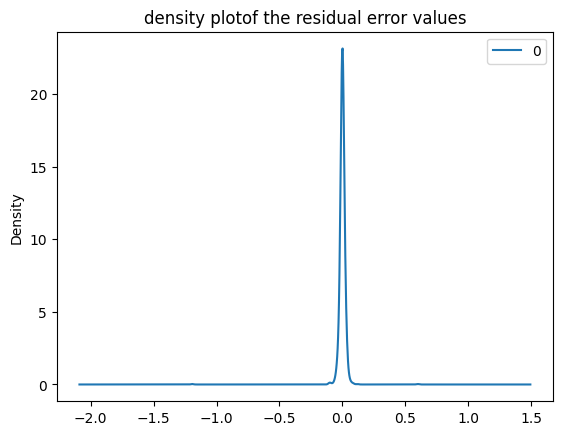

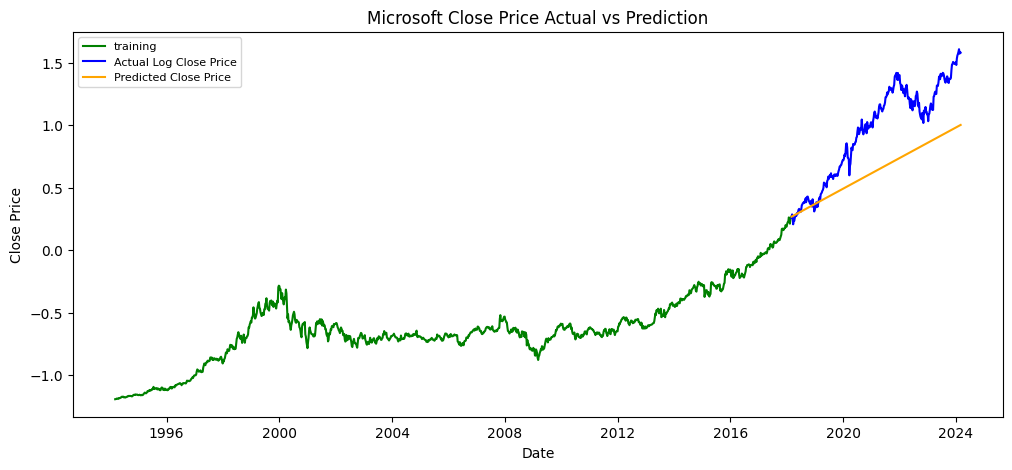

MSE: 0.13756535879208706
MAE: 0.13756535879208706
RMSE: 0.37089804366171447
MAPE: 0.2968507022202859


In [42]:
#MICROSOFT
model = ARIMA(microsoft_train['Log Close'], order=(1,2,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())
# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.title('lineplot of the residual errors')
#suggesting that they still be some trend information not captured by the model
plt.show()
residuals.plot(kind='kde')
plt.title('density plotof the residual error values')
print(residuals.describe())

#forecast
fc = results.forecast(314, alpha=0.05)
microsoft_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(microsoft_train['Log Close'], color='green',label='training')
plt.plot(microsoft_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(microsoft_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('Microsoft Close Price Actual vs Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=microsoft_test.index, y=microsoft_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=microsoft_test.index, y=microsoft_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for Microsoft',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(microsoft_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(microsoft_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(microsoft_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-microsoft_test['Log Close'])/np.abs(microsoft_test['Log Close']))
print('MAPE: '+str(mape))

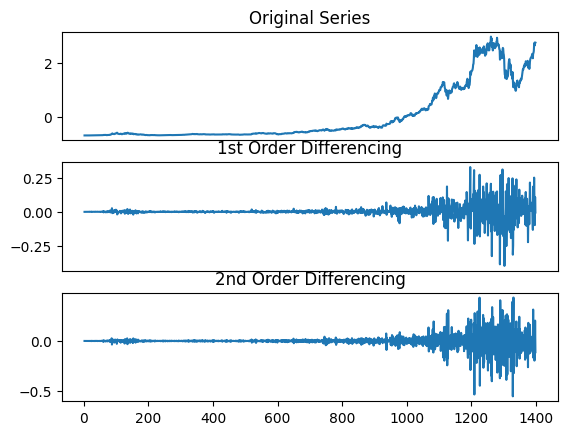

In [43]:
#selection of d parameter for Amazon
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(amazon_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(amazon_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(amazon_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.887445126232049
p-value : 2.978508495603287e-07
#Number of Lags Used : 24
Number of Observations Used : 1373
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.535437666999377
p-value : 5.2484806398464595e-27
#Number of Lags Used : 23
Number of Observations Used : 1373
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0188456687285066
p-value : 0.03317154085900348
#Number of Lags Used : 17
Number of Observations Used : 1329
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.015186348708974
p-value : 1.539715027773931e-07
#Number of Lags Used : 23
Number of Observations Used : 1320
Reject the null hypothesis. Data has no unit root and is stationary.


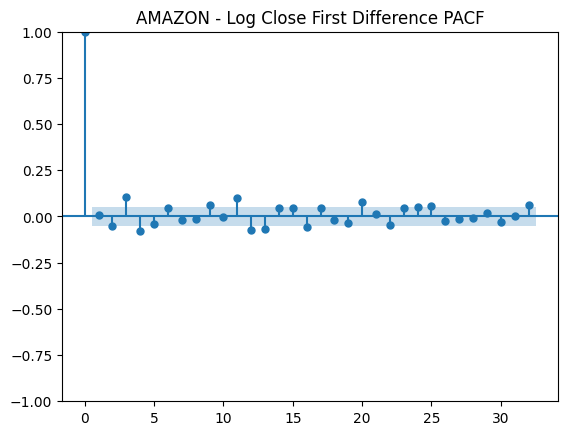

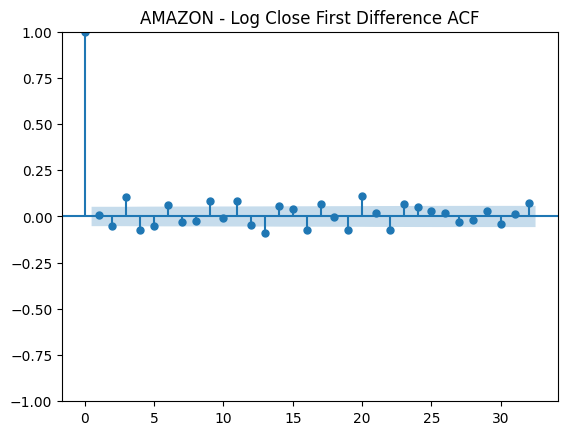

In [44]:
#correzione esponenziale di amazon con il logaritmo
amazon_df['Log Close'] = np.log(amazon_df['Close']+2)

#indagine di d, p e q per amazon

amazon_df['Log Close First Difference'] = amazon_df['Log Close']- amazon_df['Log Close'].shift(1)
adf_check(amazon_df['Log Close First Difference'].dropna())

amazon_df['Log Close Second Difference'] = amazon_df['Log Close First Difference']- amazon_df['Log Close First Difference'].shift(1)
adf_check(amazon_df['Log Close Second Difference'].dropna())

amazon_df['Log Seasonal Difference'] = amazon_df['Log Close'] - amazon_df['Log Close'].shift(52)
adf_check(amazon_df['Log Seasonal Difference'].dropna())

amazon_df['Seasonal First Difference'] = amazon_df['Log Close First Difference'] - amazon_df['Log Close First Difference'].shift(54)
adf_check(amazon_df['Seasonal First Difference'].dropna())


fig_first = plot_pacf(amazon_df['Log Close First Difference'].dropna(), title='AMAZON - Log Close First Difference PACF')
second_first = plot_acf(amazon_df['Log Close First Difference'].dropna(), title='AMAZON - Log Close First Difference ACF')


In [45]:
train_size_amazon = int(len(amazon_df) * 0.8)  # 80% for training
amazon_train, amazon_test = amazon_df[:train_size_amazon], amazon_df[train_size_amazon:]
amazon_test.set_index('Date', inplace=True)
amazon_train.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:              Log Close   No. Observations:                 1119
Model:                 ARIMA(3, 3, 1)   Log Likelihood                3813.931
Date:                Fri, 12 Apr 2024   AIC                          -7617.863
Time:                        07:46:38   BIC                          -7592.775
Sample:                    05-18-1997   HQIC                         -7608.379
                         - 10-21-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8080      0.014    -57.643      0.000      -0.835      -0.781
ar.L2         -0.6086      0.018    -33.519      0.000      -0.644      -0.573
ar.L3         -0.3122      0.016    -19.532      0.0

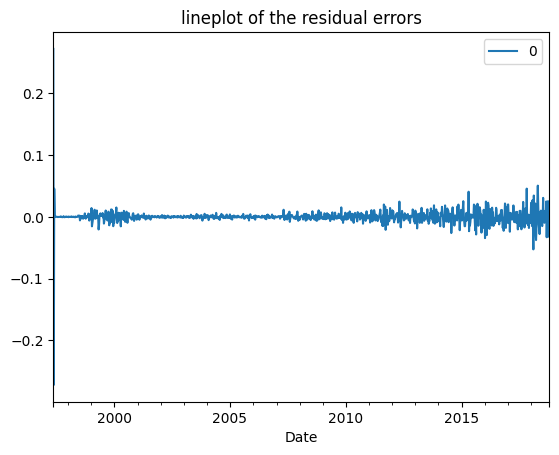

                 0
count  1119.000000
mean     -0.000012
std       0.014021
min      -0.271953
25%      -0.002583
50%      -0.000050
75%       0.002270
max       0.271781


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-46-1c12b5b86306>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



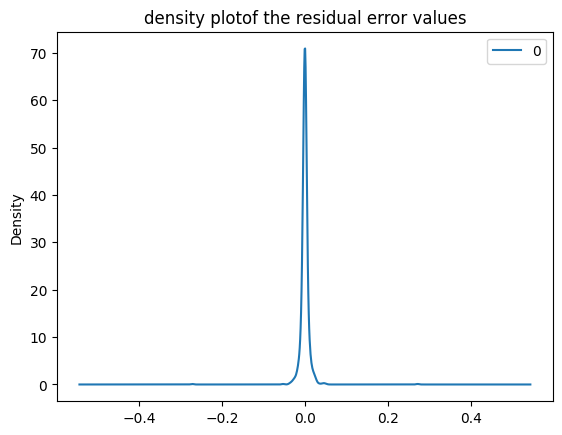

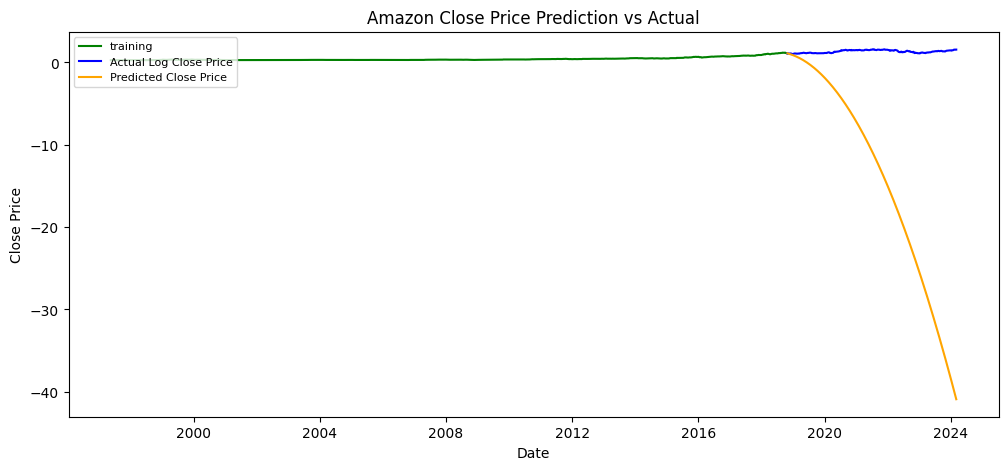

MSE: 386.4070735553462
MAE: 386.4070735553462
RMSE: 19.65723972370857
MAPE: 11.21331394503553


In [46]:
#AMAZON -->> problemi!
model = ARIMA(amazon_train['Log Close'], order=(3,3,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #suggesting that they still be some trend information not captured by the model?
plt.title('lineplot of the residual errors')
plt.show()
residuals.plot(kind='kde')
plt.title('density plotof the residual error values')
print(residuals.describe())

#forecast
fc = results.forecast(280, alpha=0.05)
amazon_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(amazon_train['Log Close'], color='green',label='training')
plt.plot(amazon_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(amazon_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('Amazon Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=amazon_test.index, y=amazon_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=amazon_test.index, y=amazon_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for Amazon',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(amazon_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(amazon_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(amazon_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-amazon_test['Log Close'])/np.abs(amazon_test['Log Close']))
print('MAPE: '+str(mape))

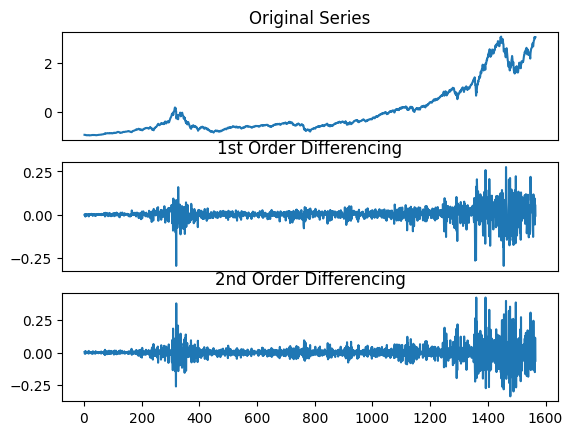

In [47]:
#selection of d parameter for Nasdaq
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(nasdaq_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(nasdaq_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(nasdaq_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.985832672890455
p-value : 1.1442373011884268e-27
#Number of Lags Used : 6
Number of Observations Used : 1558
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.328809074578377
p-value : 1.1088612715842023e-26
#Number of Lags Used : 24
Number of Observations Used : 1539
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.150645120083966
p-value : 0.0007977806768564477
#Number of Lags Used : 16
Number of Observations Used : 1495
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.02823375636399
p-value : 1.6106144012385302e-17
#Number of Lags Used : 16
Number of Observations Used : 1494
Reject the null hypothesis. Data has no unit root and is stationary.


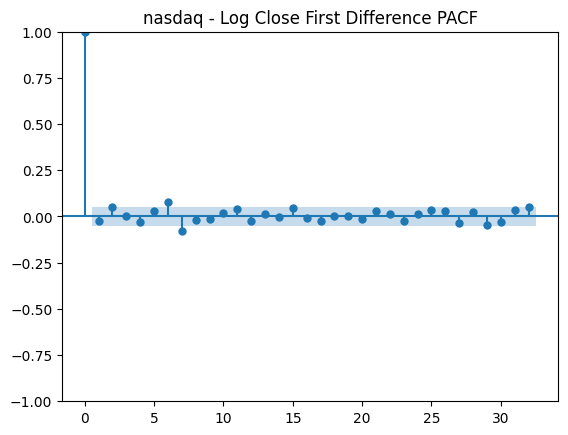

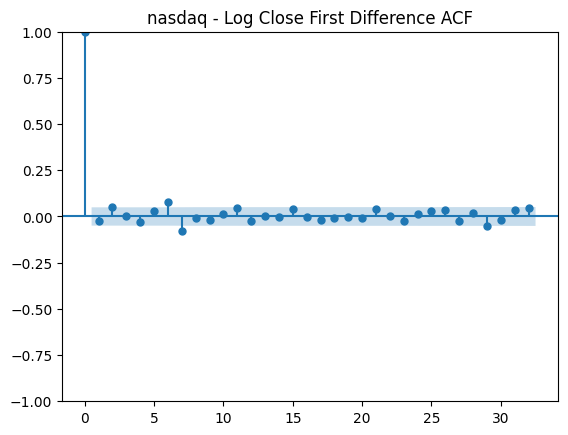

In [48]:
#correzione esponenziale di nasdaq con il logaritmo
nasdaq_df['Log Close'] = np.log(nasdaq_df['Close']+1)

#indagine di p e q per nasdaq
nasdaq_df['Log Close First Difference'] = nasdaq_df['Log Close']- nasdaq_df['Log Close'].shift(1)
adf_check(nasdaq_df['Log Close First Difference'].dropna())

nasdaq_df['Log Close Second Difference'] = nasdaq_df['Log Close First Difference']- nasdaq_df['Log Close First Difference'].shift(1)
adf_check(nasdaq_df['Log Close Second Difference'].dropna())

nasdaq_df['Log Seasonal Difference'] = nasdaq_df['Log Close'] - nasdaq_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(nasdaq_df['Log Seasonal Difference'].dropna())

nasdaq_df['Seasonal First Difference'] = nasdaq_df['Log Close First Difference'] - nasdaq_df['Log Close First Difference'].shift(54)
adf_check(nasdaq_df['Seasonal First Difference'].dropna())


fig_first = plot_pacf(nasdaq_df['Log Close First Difference'].dropna(), title='nasdaq - Log Close First Difference PACF')
second_first = plot_acf(nasdaq_df['Log Close First Difference'].dropna(), title='nasdaq - Log Close First Difference ACF')

In [49]:
train_size_nasdaq = int(len(sp500_df) * 0.8)  # 80% for training
nasdaq_train, nasdaq_test = nasdaq_df[:train_size_nasdaq], nasdaq_df[train_size_nasdaq:]
nasdaq_test.set_index('Date', inplace=True)
nasdaq_train.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(2, 2, 1)   Log Likelihood                2923.990
Date:                Fri, 12 Apr 2024   AIC                          -5839.981
Time:                        07:46:43   BIC                          -5819.457
Sample:                    03-06-1994   HQIC                         -5832.265
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0468      0.015     -3.132      0.002      -0.076      -0.018
ar.L2          0.0031      0.015      0.212      0.832      -0.026       0.032
ma.L1         -0.9957      0.003   -297.664      0.0

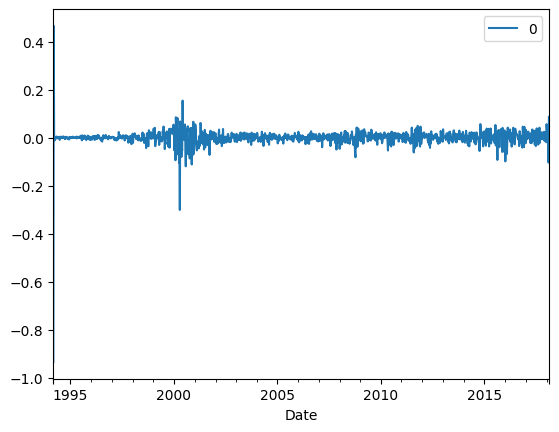

                 0
count  1252.000000
mean      0.000163
std       0.037572
min      -0.933145
25%      -0.008028
50%       0.001443
75%       0.012082
max       0.466219


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-50-3deb06708918>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



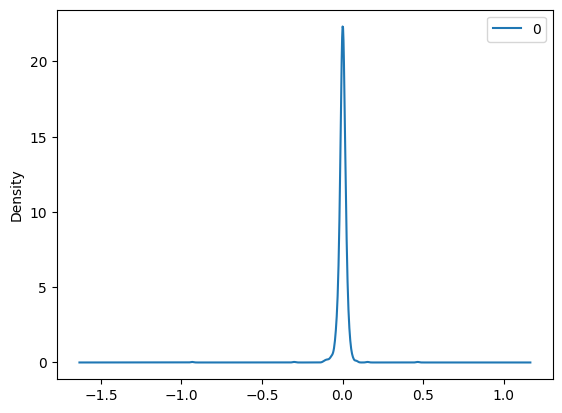

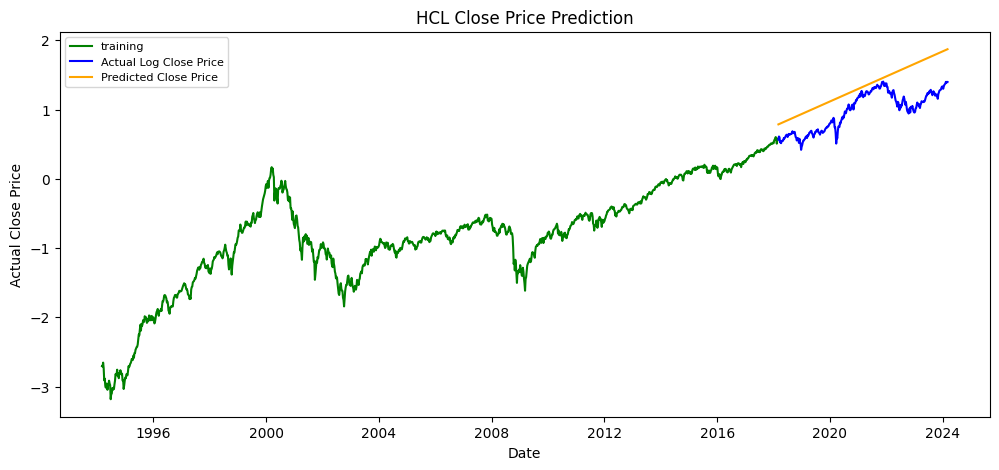

                 0
count  1252.000000
mean      0.000163
std       0.037572
min      -0.933145
25%      -0.008028
50%       0.001443
75%       0.012082
max       0.466219


<ipython-input-50-3deb06708918>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MSE: 0.1518669334016144
MAE: 0.1518669334016144
RMSE: 0.3897010821150159
MAPE: 0.39411679492731183


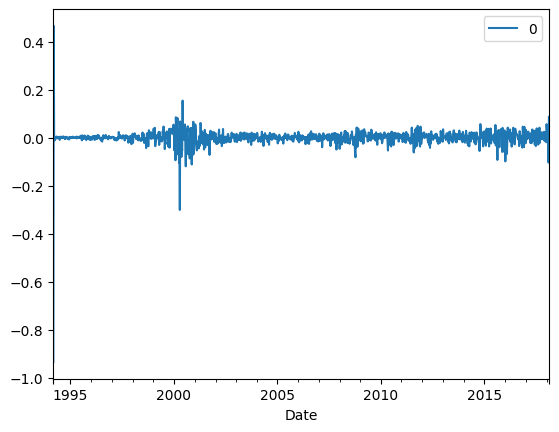

In [50]:
#nasdaq
model = ARIMA(nasdaq_train['Close'], order=(2,2,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())

nasdaq_df['Predicted Close'] = results.predict(start=nasdaq_train.index[0], end=nasdaq_train.index[-1], typ='levels')

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #lineplot of the residual errors, suggesting that they still be some trend information not captured by the model?
plt.show()
residuals.plot(kind='kde') #density plotof the residual error values
print(residuals.describe())
fc = results.forecast(314, alpha=0.05)
nasdaq_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(nasdaq_train['Log Close'], color='green',label='training')
plt.plot(nasdaq_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(nasdaq_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('HCL Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Actual Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
print(residuals.describe())
nasdaq_test['Residual'] = nasdaq_test['Log Close'].iloc[2:] - nasdaq_test['Log Close'].iloc[2:]


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=nasdaq_test.index, y=nasdaq_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=nasdaq_test.index, y=nasdaq_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for nasdaq',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(nasdaq_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(nasdaq_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(nasdaq_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-nasdaq_test['Log Close'])/np.abs(nasdaq_test['Log Close']))
print('MAPE: '+str(mape))

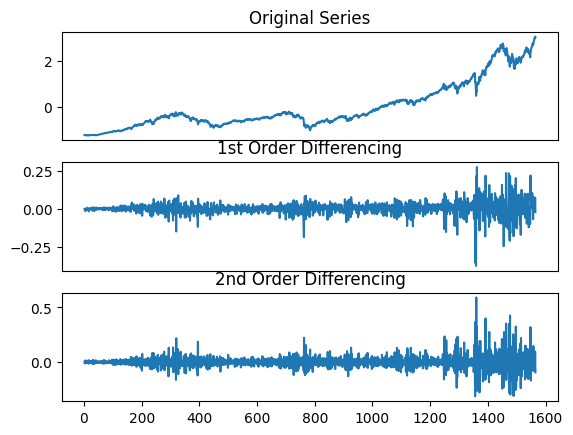

In [51]:
#selection of d parameter for sp500
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(sp500_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(sp500_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(sp500_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.18366182641815
p-value : 2.217139474801136e-15
#Number of Lags Used : 20
Number of Observations Used : 1411
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -15.610073633649513
p-value : 1.7844143627609273e-28
#Number of Lags Used : 22
Number of Observations Used : 1408
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.492335264524583
p-value : 0.000203006672134582
#Number of Lags Used : 22
Number of Observations Used : 1356
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.391713097585546
p-value : 2.356957087079546e-13
#Number of Lags Used : 20
Number of Observations Used : 1357
Reject the null hypothesis. Data has no unit root and is stationary.


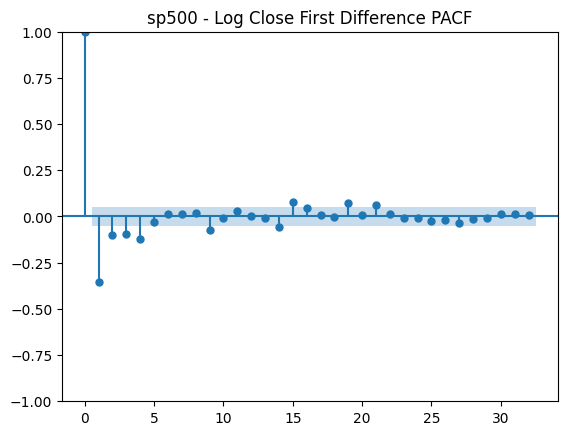

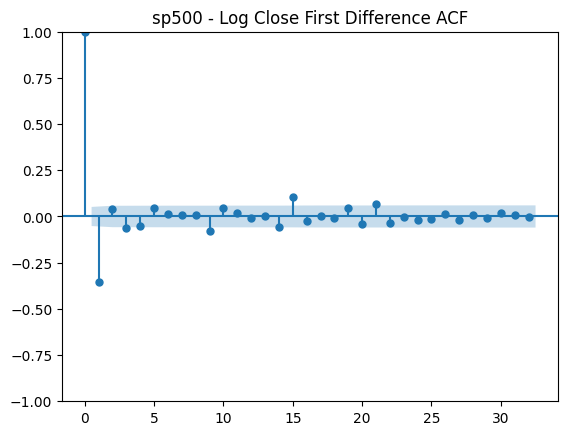

In [52]:
#correzione esponenziale di sp500 con il logaritmo
sp500_df['Log Close'] = np.log(sp500_df['Close']+1)

#indagine di p e q per sp500
sp500_df['Log Close First Difference'] = sp500_df['Log Close']- sp500_df['Log Close'].shift(1)
adf_check(sp500_df['Log Close First Difference'].dropna())

sp500_df['Log Close Second Difference'] = sp500_df['Log Close First Difference']- sp500_df['Log Close First Difference'].shift(1)
adf_check(sp500_df['Log Close Second Difference'].dropna())

sp500_df['Log Seasonal Difference'] = sp500_df['Log Close'] - sp500_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(sp500_df['Log Seasonal Difference'].dropna())

sp500_df['Seasonal First Difference'] = sp500_df['Log Close First Difference'] - sp500_df['Log Close First Difference'].shift(54)
adf_check(sp500_df['Seasonal First Difference'].dropna())

fig_first = plot_pacf(sp500_df['Log Close First Difference'].dropna(), title='sp500 - Log Close First Difference PACF')
second_first = plot_acf(sp500_df['Log Close First Difference'].dropna(), title='sp500 - Log Close First Difference ACF')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(4, 1, 1)   Log Likelihood                2763.461
Date:                Fri, 12 Apr 2024   AIC                          -5514.922
Time:                        07:46:47   BIC                          -5484.132
Sample:                    03-06-1994   HQIC                         -5503.347
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0432      0.860     -0.050      0.960      -1.729       1.642
ar.L2          0.0225      0.076      0.295      0.768      -0.127       0.172
ar.L3         -0.0371      0.025     -1.466      0.1

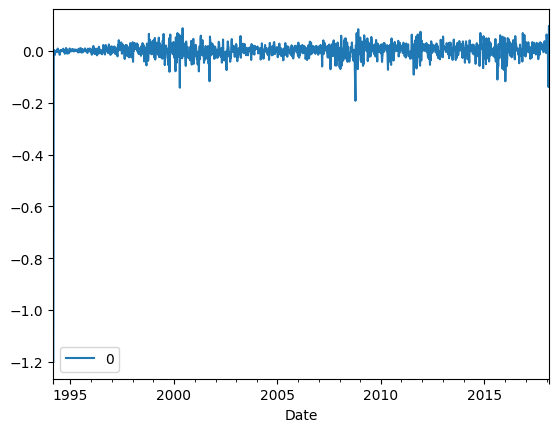

                 0
count  1252.000000
mean      0.000937
std       0.043099
min      -1.200693
25%      -0.011351
50%       0.003092
75%       0.016506
max       0.097334


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-53-128fe58f8fe1>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



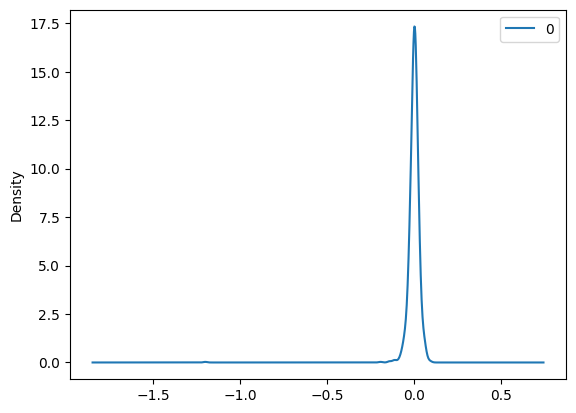

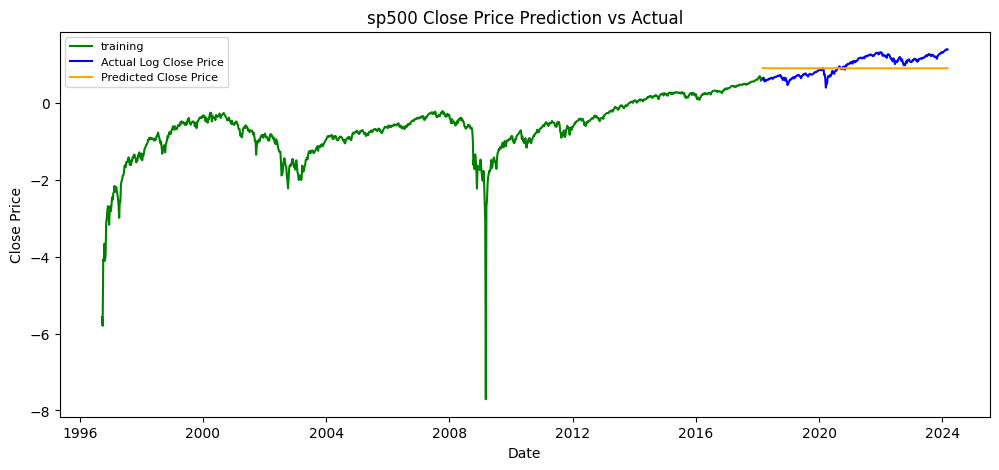

MSE: 0.06716249450931486
MAE: 0.06716249450931486
RMSE: 0.2591572775542197
MAPE: 0.25456000881926566


In [53]:
#sp500

train_size_sp500 = int(len(sp500_df) * 0.8)  # 80% for training
sp500_train, sp500_test = sp500_df[:train_size_sp500], sp500_df[train_size_sp500:]
sp500_test.set_index('Date', inplace=True)
sp500_train.set_index('Date', inplace=True)
model = ARIMA(sp500_train['Close'], order=(4,1,1)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #lineplot of the residual errors, suggesting that they still be some trend information not captured by the model?
plt.show()
residuals.plot(kind='kde') #density plotof the residual error values
print(residuals.describe())

#forecast
fc = results.forecast(314, alpha=0.05)
sp500_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(sp500_train['Log Close'], color='green',label='training')
plt.plot(sp500_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(sp500_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('sp500 Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=sp500_test.index, y=sp500_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=sp500_test.index, y=sp500_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for sp500',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(sp500_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(sp500_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(sp500_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-sp500_test['Log Close'])/np.abs(sp500_test['Log Close']))
print('MAPE: '+str(mape))

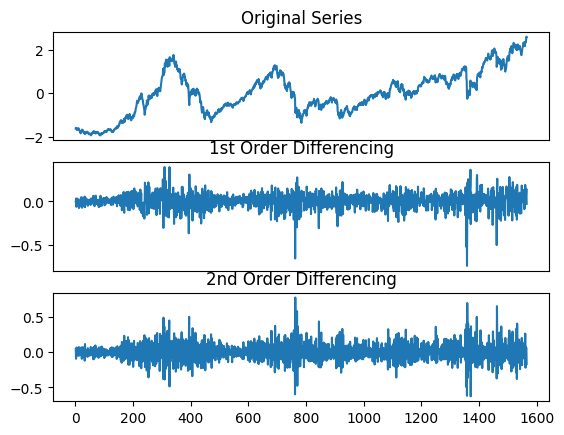

In [54]:
#selection of d parameter for cac
#as the Close are not stationary, we should consider d such as they would become so.
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(cac_df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
    # 1st Differencing
ax2.plot(cac_df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
    # 2nd Differencing
ax3.plot(cac_df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

#--> to get standardized data, we use the log on the close prices and check it with adf_check

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.973303509547613
p-value : 2.744329705904774e-12
#Number of Lags Used : 22
Number of Observations Used : 1542
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -16.774528101993486
p-value : 1.2788901131954013e-29
#Number of Lags Used : 20
Number of Observations Used : 1543
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.4811941494130743
p-value : 0.008483409254403804
#Number of Lags Used : 24
Number of Observations Used : 1487
Reject the null hypothesis. Data has no unit root and is stationary.
Augmented Dickey-Fuller Test:
ADF Test Statistic : -8.494046127137635
p-value : 1.2902069061651457e-13
#Number of Lags Used : 24
Number of Observations Used : 1486
Reject the null hypothesis. Data has no unit root and is stationary.
selection of p
selection of q


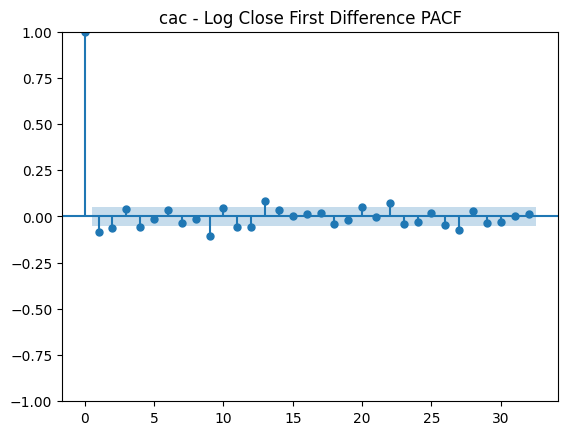

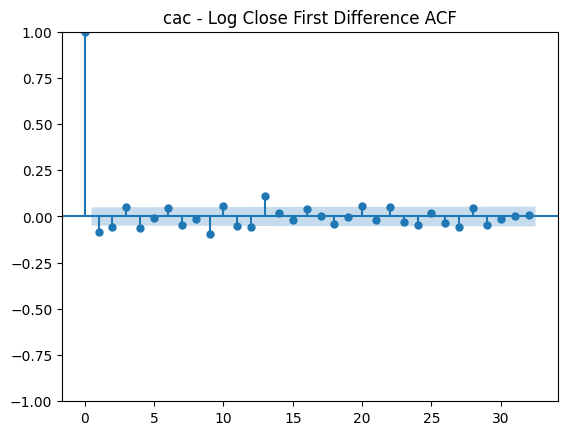

In [55]:
#correzione esponenziale di cac con il logaritmo
cac_df['Log Close'] = np.log(cac_df['Close']+2)


#indagine di p e q per cac
cac_df['Log Close First Difference'] = cac_df['Log Close']- cac_df['Log Close'].shift(1)
adf_check(cac_df['Log Close First Difference'].dropna())

cac_df['Log Close Second Difference'] = cac_df['Log Close First Difference']- cac_df['Log Close First Difference'].shift(1)
adf_check(cac_df['Log Close Second Difference'].dropna())

cac_df['Log Seasonal Difference'] = cac_df['Log Close'] - cac_df['Log Close'].shift(54) #verificaredi avere 54 settimane per anno nei dataset
adf_check(cac_df['Log Seasonal Difference'].dropna())

cac_df['Seasonal First Difference'] = cac_df['Log Close First Difference'] - cac_df['Log Close First Difference'].shift(54)
adf_check(cac_df['Seasonal First Difference'].dropna())

    #Plots the autocorrelation function (ACF) for the first differenced data and the seasonal first differenced data:
    #ACF plots are needed to select q parameters, while PACF are useful to get p

print('selection of p')
fig_first = plot_pacf(cac_df['Log Close First Difference'].dropna(), title='cac - Log Close First Difference PACF')

print('selection of q')
second_first = plot_acf(cac_df['Log Close First Difference'].dropna(), title='cac - Log Close First Difference ACF')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(1, 1, 2)   Log Likelihood                1327.527
Date:                Fri, 12 Apr 2024   AIC                          -2647.055
Time:                        07:46:50   BIC                          -2626.528
Sample:                    03-06-1994   HQIC                         -2639.338
                         - 02-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4965      3.419      0.145      0.885      -6.204       7.197
ma.L1         -0.5559      3.418     -0.163      0.871      -7.255       6.143
ma.L2          0.0253      0.213      0.119      0.9

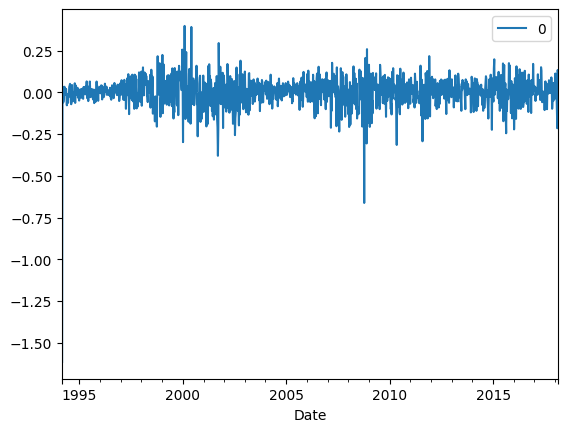

                 0
count  1252.000000
mean      0.000665
std       0.095381
min      -1.615668
25%      -0.042768
50%       0.008528
75%       0.052211
max       0.398347


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

<ipython-input-56-e04ebc8a20a6>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



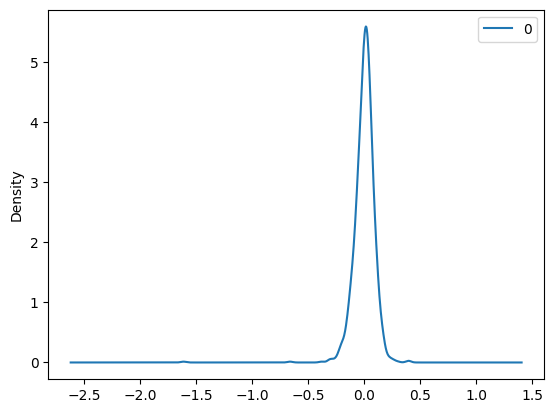

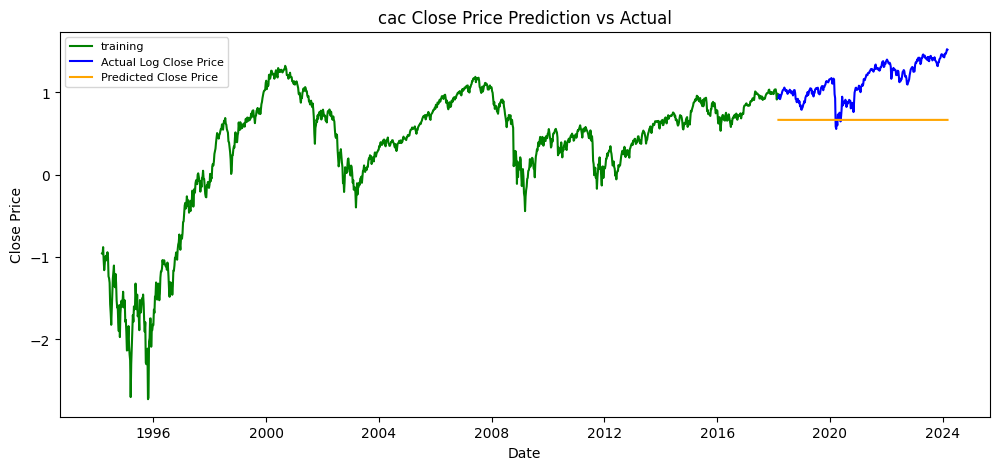

MSE: 0.2697856289173139
MAE: 0.2697856289173139
RMSE: 0.5194089226392957
MAPE: 0.3969730052720457


In [56]:
#cac

train_size_cac = int(len(cac_df) * 0.8)  # 80% for training
cac_train, cac_test = cac_df[:train_size_cac], cac_df[train_size_cac:]
cac_test.set_index('Date', inplace=True)
cac_train.set_index('Date', inplace=True)

model = ARIMA(cac_train['Close'], order=(1,1,2)) #ORDERS: TO BE DECIDED ON THE ANALYSIS ABOVE.
        ##add the seasonal orders too!!

results = model.fit()
print(results.summary())

# Get the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot() #lineplot of the residual errors, suggesting that they still be some trend information not captured by the model?
plt.show()
residuals.plot(kind='kde') #density plotof the residual error values
print(residuals.describe())
fc = results.forecast(314, alpha=0.05)
cac_test['forecast'] = fc
plt.figure(figsize=(12,5), dpi=100)
plt.plot(cac_train['Log Close'], color='green',label='training')
plt.plot(cac_test['Log Close'], color='blue', label='Actual Log Close Price')
plt.plot(cac_test['forecast'], color='orange', label='Predicted Close Price')
plt.title('cac Close Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


fig = go.Figure()

# Add traces for 'Predicted Close' and 'Close'
fig.add_trace(go.Scatter(x=cac_test.index, y=cac_test['forecast'], mode='lines', name='Predicted Log Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=cac_test.index, y=cac_test['Log Close'], mode='lines', name='Actual Log Close', line=dict(color='red')))

# Update layout for better zooming
fig.update_layout(
    title='Predicted vs Actual Log Close Prices for Cac',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(title='Close Price'),
)

fig.show()


mse = mean_squared_error(cac_test['Log Close'], fc)
print('MSE: '+str(mse))
mae = mean_squared_error(cac_test['Log Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(cac_test['Log Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc-cac_test['Log Close'])/np.abs(cac_test['Log Close']))
print('MAPE: '+str(mape))

## LSTM

TAKE CARE!! Run the notebook ONLY including the first two cells of ARIMA and then come here.

In [57]:
import yfinance as yf
import pandas_ta as ta
import keras.models, keras.layers
import tensorflow as tf
import numpy as np

(1416, 16)
(1416, 23)
<class 'pandas.core.frame.DataFrame'>
[2.3584003940010216, 2.451111623062456, 2.55548057592062, 2.1578779114364117, 2.3521067706668575, 2.125842241430463, 2.0617685922513713, 1.8212402344142804, 1.9878311881935522, 2.0196153130393837, 2.0035822493137134, 1.7063284470438451, 1.8623460035423798, 1.667124186736208, 1.748644850373136, 1.8519317156671216, 2.089302796973456, 2.4368318726493134, 2.5772310346995972, 2.6103436756358374, 2.7262761758837724, 0.336590518633749, 0.26394275082087426, 0.33409853015692126, 0.35555184707487575, 0.3961453594293409, 0.46586902106525896, 0.42089377468745093, 0.6704612792977169, 0.7211975627353622, 0.6624283641285874, 0.7055445523032191, 0.5554380777437601, 0.7404371599317001, 0.5854861972690103, 0.6986022909250137, 0.5264233222499621, 0.6099833867321327, 0.6083570549427532, 0.6785521580642666, 0.7585007740184291, 0.4711074401129045, 0.5074681070417109, 0.5510316065314772, 0.5818806671836223, 0.6153165348457219, 0.6409895477358886, 0.

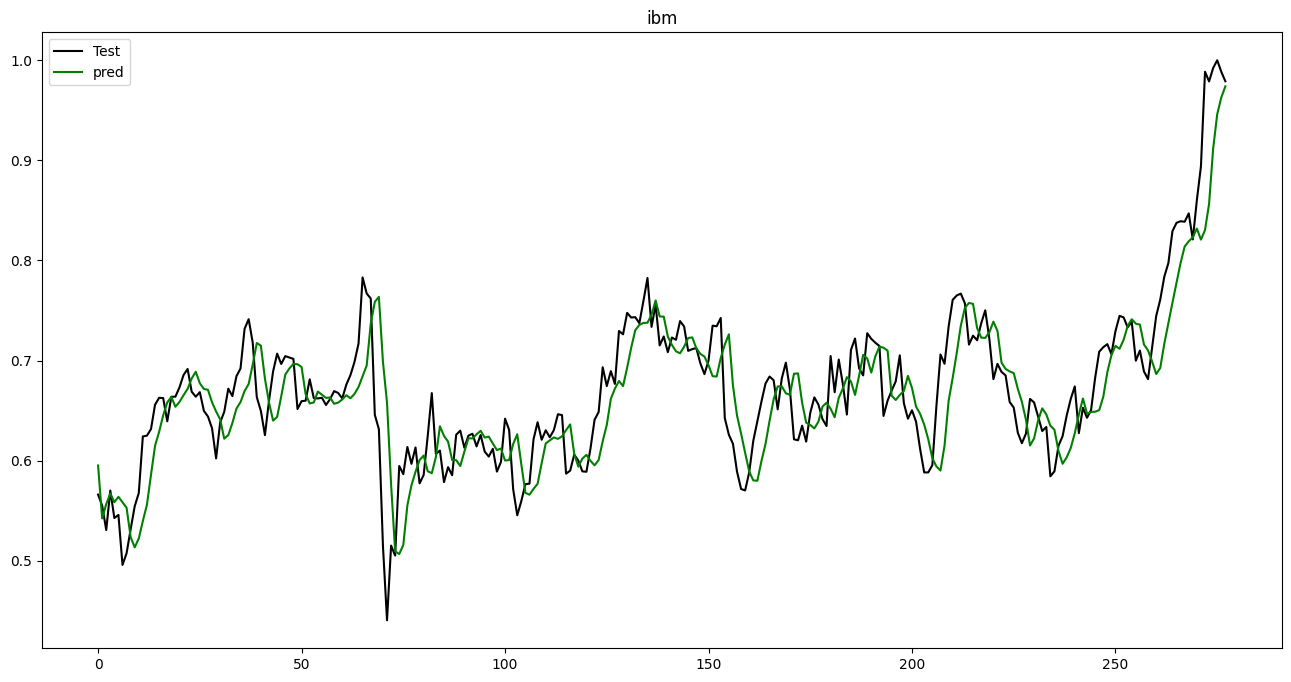

In [58]:
#IBM

# Adding indicators
ibm_df['RSI']=ta.rsi(ibm_df.Close, length=15)
ibm_df['EMAF']=ta.ema(ibm_df.Close, length=20)
ibm_df['EMAM']=ta.ema(ibm_df.Close, length=100)
ibm_df['EMAS']=ta.ema(ibm_df.Close, length=150)

ibm_df['Target'] = ibm_df['Close']-ibm_df.Open
ibm_df['Target'] = ibm_df['Target'].shift(-1)

ibm_df['TargetClass'] = [1 if ibm_df.Target[i]>0 else 0 for i in range(len(ibm_df))]

ibm_df['TargetNextClose'] = ibm_df['Close'].shift(-1)

ibm_df.dropna(inplace=True)
ibm_df.reset_index(inplace = True)
ibm_df_set = ibm_df.loc[:, [ 'Open', 'High', 'Low', 'Close', 'Volume', 'MA10',
       'MA40', 'MACD', 'Signal_Line', 'RSI', 'EMAF', 'EMAM',
       'EMAS', 'Target', 'TargetClass', 'TargetNextClose']]#.values
pd.set_option('display.max_columns', None)

ibm_df_set.head(10)
print(ibm_df_set.shape)
print(ibm_df.shape)
print(type(ibm_df_set))
#Target column Categories
y =[1 if ibm_df.Open[i]>ibm_df.Close[i] else 0 for i in range(0, len(ibm_df))]
yi = [ibm_df.Open[i]-ibm_df.Close[i] for i in range(0, len(ibm_df))]
print(yi)
print(len(yi))
sc = MinMaxScaler(feature_range=(0,1))
ibm_df_set_scaled = sc.fit_transform(ibm_df_set)

# multiple feature from ibm_df provided to the model
X = []
#print(ibm_df_set_scaled[0].size)
#ibm_df_set_scaled=ibm_df_set.values
backcandles = 30
print(ibm_df_set_scaled.shape[0])
for j in range(8):#ibm_df_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, ibm_df_set_scaled.shape[0]):#backcandles+2
        X[j].append(ibm_df_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(ibm_df_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)
#also comprehensions for X
#X = np.array([ibm_df_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(ibm_df_set_scaled))])
#print(X)
#print(X.shape)
# split ibm_df into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 8), name='lstm_input')
inputs = keras.layers.LSTM(150, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.title('ibm')
plt.show()

(1416, 16)
(1416, 23)
<class 'pandas.core.frame.DataFrame'>
[0.5908526527677719, 0.594031392079351, 0.6079326626093006, 0.7169000353426621, 0.7926721369813033, 0.772470927941825, 0.7375019562481637, 0.6941484969603153, 0.7281911932476931, 0.7274624863218817, 0.7490969103227347, 0.6842756506110093, 0.6838359896005526, 0.713288517677353, 0.6900918965309348, 0.8324065833412582, 0.9070138514557131, 0.9821370317989422, 0.957716898922512, 0.9336497587694126, 1.0127273387354023, 1.0399080131644158, 1.0328372234914625, 1.0900985131550718, 1.0954962219971, 1.069222433231879, 1.1023274851194051, 1.0938661772608023, 1.2176853383804045, 1.1958943685524823, 1.2086213239062107, 1.2127077311468906, 1.1235943688181655, 1.1876707269547686, 1.1250449000130616, 1.180412632718687, 1.1574314923841342, 1.1516772729146791, 1.1319593135183967, 1.1591504050162187, 1.177013417280049, 1.1254629281126065, 1.153536536724522, 1.1126262106577283, 1.1108776608737947, 1.141126360588478, 1.1692893896342929, 1.225930043

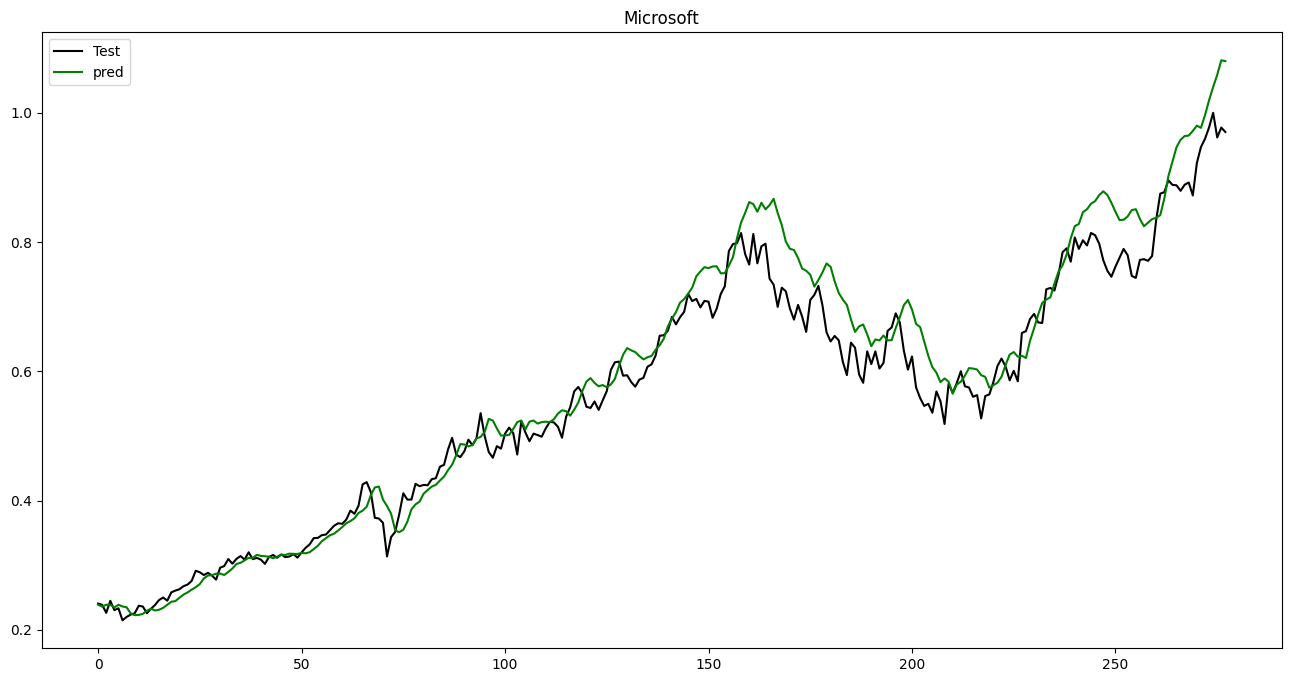

In [59]:
#microsoft

# Adding indicators
microsoft_df['RSI']=ta.rsi(microsoft_df.Close, length=15)
microsoft_df['EMAF']=ta.ema(microsoft_df.Close, length=20)
microsoft_df['EMAM']=ta.ema(microsoft_df.Close, length=100)
microsoft_df['EMAS']=ta.ema(microsoft_df.Close, length=150)

microsoft_df['Target'] = microsoft_df['Close']-microsoft_df.Open
microsoft_df['Target'] = microsoft_df['Target'].shift(-1)

microsoft_df['TargetClass'] = [1 if microsoft_df.Target[i]>0 else 0 for i in range(len(microsoft_df))]

microsoft_df['TargetNextClose'] = microsoft_df['Close'].shift(-1)

microsoft_df.dropna(inplace=True)
microsoft_df.reset_index(inplace = True)
microsoft_df_set = microsoft_df.loc[:, [ 'Open', 'High', 'Low', 'Close', 'Volume', 'MA10',
       'MA40', 'MACD', 'Signal_Line', 'RSI', 'EMAF', 'EMAM',
       'EMAS', 'Target', 'TargetClass', 'TargetNextClose']]#.values
pd.set_option('display.max_columns', None)

microsoft_df_set.head(10)
print(microsoft_df_set.shape)
print(microsoft_df.shape)
print(type(microsoft_df_set))
#Target column Categories
y =[1 if microsoft_df.Open[i]>microsoft_df.Close[i] else 0 for i in range(0, len(microsoft_df))]
yi = [microsoft_df.Open[i]-microsoft_df.Close[i] for i in range(0, len(microsoft_df))]
print(yi)
print(len(yi))
sc = MinMaxScaler(feature_range=(0,1))
microsoft_df_set_scaled = sc.fit_transform(microsoft_df_set)

# multiple feature from microsoft_df provided to the model
X = []
#print(microsoft_df_set_scaled[0].size)
#microsoft_df_set_scaled=microsoft_df_set.values
backcandles = 30
print(microsoft_df_set_scaled.shape[0])
for j in range(8):#microsoft_df_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, microsoft_df_set_scaled.shape[0]):#backcandles+2
        X[j].append(microsoft_df_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(microsoft_df_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)
#also comprehensions for X
#X = np.array([microsoft_df_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(microsoft_df_set_scaled))])
#print(X)
#print(X.shape)
# split microsoft_df into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 8), name='lstm_input')
inputs = keras.layers.LSTM(150, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.title('Microsoft')
plt.legend()
plt.show()

(1249, 16)
(1249, 23)
<class 'pandas.core.frame.DataFrame'>
[-0.016513693277575014, -0.0022856882387023436, -0.009568517992146752, 0.012530077853455168, -0.014604677253325593, -0.013290125545608045, -0.00999643451250598, -0.004530861562494493, -0.006575710120677369, -0.001180598562085633, -0.017966028623851438, -0.004756933144384412, -0.0014925121709016276, 0.0038028330181036907, -0.008655040790333413, -0.007112501314647468, -0.013679261732024495, -0.005907587345511001, 0.0032225382930360924, -0.01009942691077359, -0.009350913452258913, -0.01308394746612207, -0.008477649872847826, -0.010289397409769308, -0.0096010489989945, -0.00860870724377305, -0.005596861776350437, -0.004905706354499162, -0.0011517475200714111, -0.00592622892824568, -0.01035711567012676, -0.01353757588421467, -0.012105070160328357, 0.000691221181094881, -0.0063648088440365624, -0.010615992469135138, -0.0026776834020485474, -0.006019659086336393, -0.007752198022484835, -0.002673356218112266, -0.007057542361681435, -0

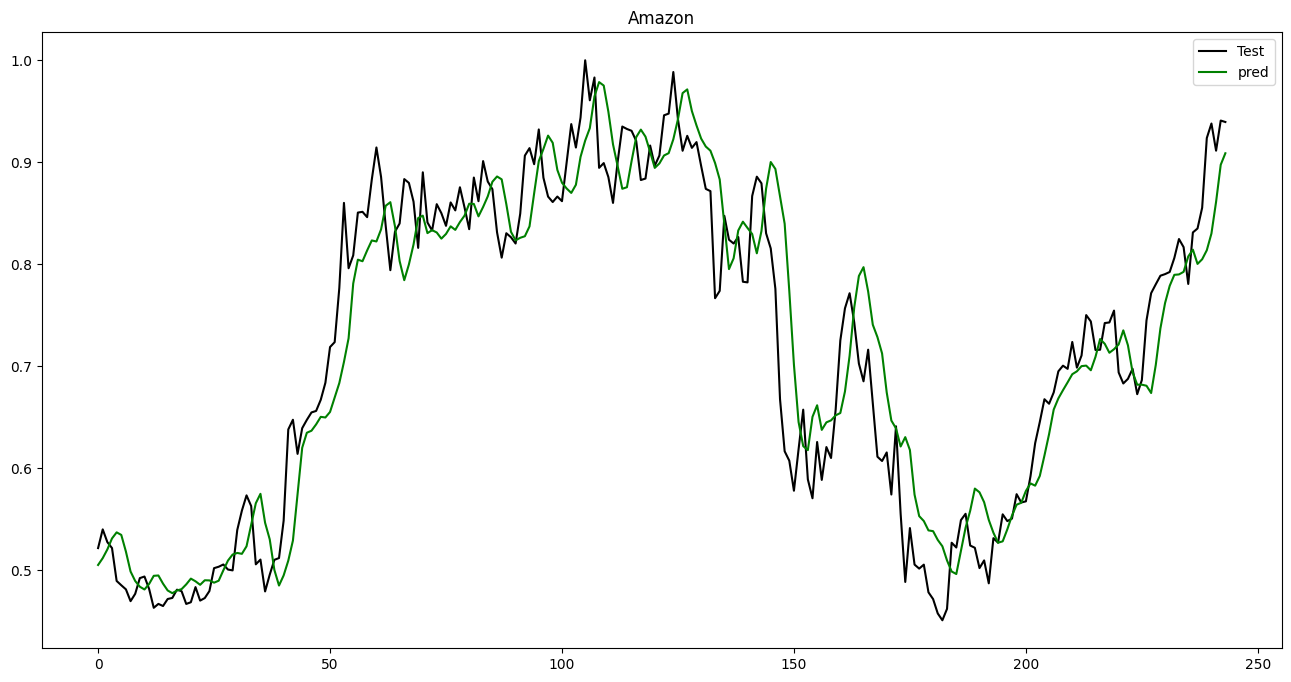

In [60]:
#amazon

# Adding indicators
amazon_df['RSI']=ta.rsi(amazon_df.Close, length=15)
amazon_df['EMAF']=ta.ema(amazon_df.Close, length=20)
amazon_df['EMAM']=ta.ema(amazon_df.Close, length=100)
amazon_df['EMAS']=ta.ema(amazon_df.Close, length=150)

amazon_df['Target'] = amazon_df['Close']-amazon_df.Open
amazon_df['Target'] = amazon_df['Target'].shift(-1)

amazon_df['TargetClass'] = [1 if amazon_df.Target[i]>0 else 0 for i in range(len(amazon_df))]

amazon_df['TargetNextClose'] = amazon_df['Close'].shift(-1)

amazon_df.dropna(inplace=True)
amazon_df.reset_index(inplace = True)
amazon_df_set = amazon_df.loc[:, [ 'Open', 'High', 'Low', 'Close', 'Volume', 'MA10',
       'MA40', 'MACD', 'Signal_Line', 'RSI', 'EMAF', 'EMAM',
       'EMAS', 'Target', 'TargetClass', 'TargetNextClose']]

pd.set_option('display.max_columns', None)

amazon_df_set.head(10)
print(amazon_df_set.shape)
print(amazon_df.shape)
print(type(amazon_df_set))
#Target column Categories
y =[1 if amazon_df.Open[i]>amazon_df.Close[i] else 0 for i in range(0, len(amazon_df))]
yi = [amazon_df.Open[i]-amazon_df.Close[i] for i in range(0, len(amazon_df))]
print(yi)
print(len(yi))
sc = MinMaxScaler(feature_range=(0,1))
amazon_df_set_scaled = sc.fit_transform(amazon_df_set)
# multiple feature from amazon_df provided to the model
X = []
#print(amazon_df_set_scaled[0].size)
#amazon_df_set_scaled=amazon_df_set.values
backcandles = 30
print(amazon_df_set_scaled.shape[0])
for j in range(8):#amazon_df_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, amazon_df_set_scaled.shape[0]):#backcandles+2
        X[j].append(amazon_df_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(amazon_df_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)
#also comprehensions for X
#X = np.array([amazon_df_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(amazon_df_set_scaled))])
#print(X)
#print(X.shape)
# split amazon_df into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 8), name='lstm_input')
inputs = keras.layers.LSTM(150, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.title('Amazon')
plt.show()

(1377, 16)
(1377, 23)
<class 'pandas.core.frame.DataFrame'>
[-0.0011108643436829047, 0.021681897294152486, 0.002946243778294333, 0.025478802041483672, -0.011308523579517171, -0.00018884660669948872, -0.03137354400739867, 0.007752501257498157, -0.025460267077421883, 0.028699675677200664, 0.006733303453695938, 0.010128917981024443, -0.03488479062382177, 0.044270012306947715, -0.030528917449304416, 0.004280046526961234, -0.02021066207007305, -0.028881200474228153, -0.006210948868264232, -0.012161379236254377, -0.013053234795720181, -0.004935842157619441, -0.010963436634974899, -0.027148240034056026, 0.004459885791088025, -0.024050738968322438, 0.012166932920202433, -0.010017687214035065, 0.014733696647119543, -0.010990973413212979, 0.012926014147544684, 0.0005184611712063525, -0.0005379430151977171, 0.019144863663325684, -0.020180682146435758, 0.014894277659856514, -0.0006284751582746884, -0.02890351027106053, -0.011034514191453293, -0.01531423045267477, -0.019415959113104786, 0.043541501

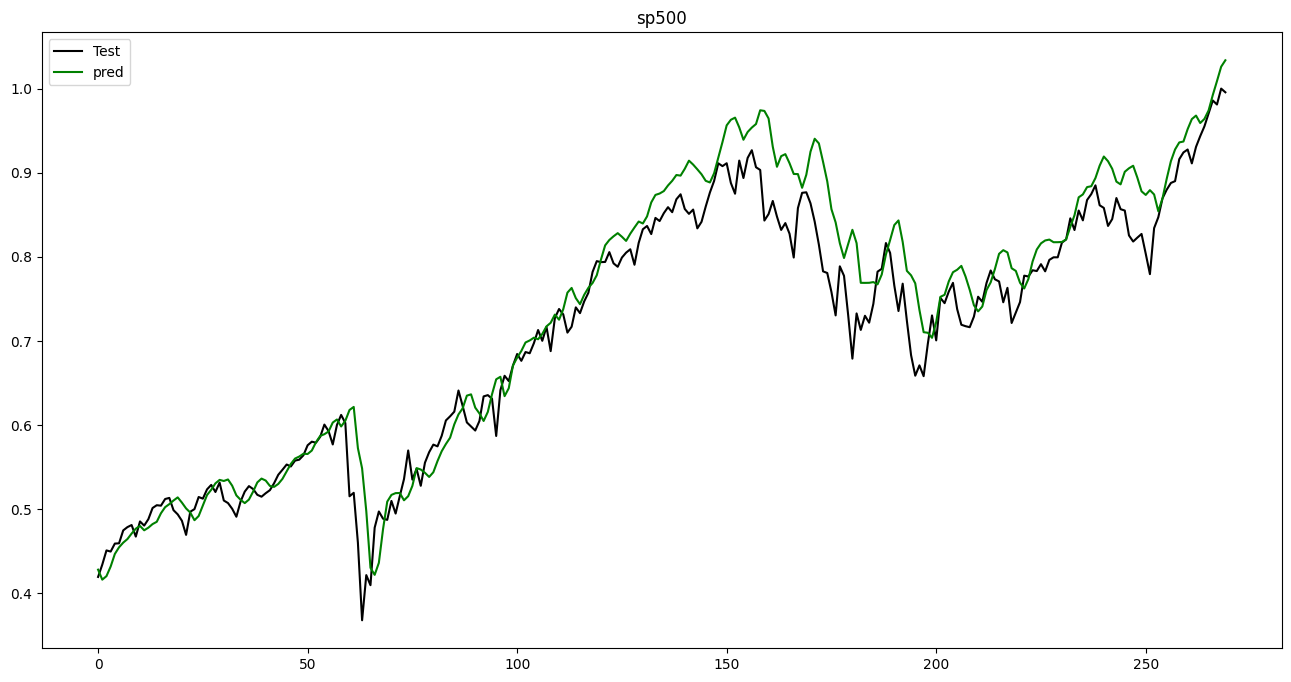

In [61]:
#sp500

# Adding indicators
sp500_df['RSI']=ta.rsi(sp500_df.Close, length=15)
sp500_df['EMAF']=ta.ema(sp500_df.Close, length=20)
sp500_df['EMAM']=ta.ema(sp500_df.Close, length=100)
sp500_df['EMAS']=ta.ema(sp500_df.Close, length=150)

sp500_df['Target'] = sp500_df['Close']-sp500_df.Open
sp500_df['Target'] = sp500_df['Target'].shift(-1)

sp500_df['TargetClass'] = [1 if sp500_df.Target[i]>0 else 0 for i in range(len(sp500_df))]

sp500_df['TargetNextClose'] = sp500_df['Close'].shift(-1)

sp500_df.dropna(inplace=True)
sp500_df.reset_index(inplace = True)
sp500_df_set = sp500_df.loc[:, [ 'Open', 'High', 'Low', 'Close', 'Volume', 'MA10',
       'MA40', 'MACD', 'Signal_Line', 'RSI', 'EMAF', 'EMAM',
       'EMAS', 'Target', 'TargetClass', 'TargetNextClose']]#.values
pd.set_option('display.max_columns', None)

sp500_df_set.head(10)
print(sp500_df_set.shape)
print(sp500_df.shape)
print(type(sp500_df_set))
#Target column Categories
y =[1 if sp500_df.Open[i]>sp500_df.Close[i] else 0 for i in range(0, len(sp500_df))]
yi = [sp500_df.Open[i]-sp500_df.Close[i] for i in range(0, len(sp500_df))]
print(yi)
print(len(yi))
sc = MinMaxScaler(feature_range=(0,1))
sp500_df_set_scaled = sc.fit_transform(sp500_df_set)

# multiple feature from sp500_df provided to the model
X = []
#print(sp500_df_set_scaled[0].size)
#sp500_df_set_scaled=sp500_df_set.values
backcandles = 30
print(sp500_df_set_scaled.shape[0])
for j in range(8):#sp500_df_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, sp500_df_set_scaled.shape[0]):#backcandles+2
        X[j].append(sp500_df_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(sp500_df_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)
#also comprehensions for X
#X = np.array([sp500_df_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(sp500_df_set_scaled))])
#print(X)
#print(X.shape)
# split sp500_df into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 8), name='lstm_input')
inputs = keras.layers.LSTM(150, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.title('sp500')
plt.legend()
plt.show()

(1416, 16)
(1416, 23)
<class 'pandas.core.frame.DataFrame'>
[-0.012308516580678441, -0.050859532303191735, -0.0019653687461953506, -0.05287002875772506, -0.05595514737729035, -0.03135754676526936, 0.04113304253443428, -0.030538519318127122, -0.06573292605053416, 0.041439708105156736, 0.03711057009592156, -0.034784658202258845, 0.04964089438730146, -0.012024027228047629, -0.005211993188950048, -0.014051612953473125, -0.07925710122277119, 0.014045759320648887, -0.09786761471812477, -0.002844213129320705, 0.05391899850768378, -0.14975804982680163, -0.050296360223464065, 0.04673906569026154, -0.10692754697367501, -0.03533776542244693, -0.016288454442897393, 0.050318514151786786, -0.12408879356419056, -0.01562929389394563, 0.04849580679551768, 0.03217309829040227, -0.04138906794102182, 0.12104802534299197, -0.09232153136749321, 0.061751987090860494, -0.07522537919661887, 0.0051005921273059585, -0.08707499145639697, 0.08842137294847363, 0.009746799116067795, 0.06562315765317317, 0.0532976122

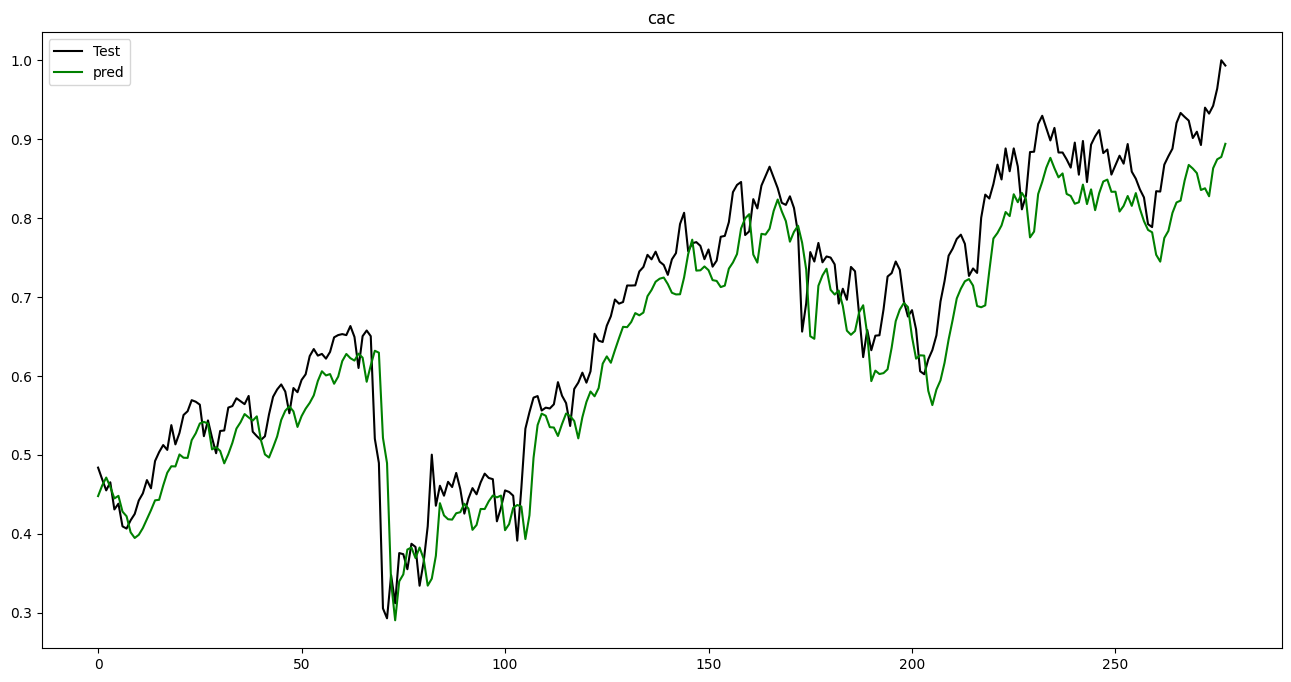

In [62]:
#cac

# Adding indicators
cac_df['RSI']=ta.rsi(cac_df.Close, length=15)
cac_df['EMAF']=ta.ema(cac_df.Close, length=20)
cac_df['EMAM']=ta.ema(cac_df.Close, length=100)
cac_df['EMAS']=ta.ema(cac_df.Close, length=150)
cac_df['Target'] = cac_df['Close']-cac_df.Open
cac_df['Target'] = cac_df['Target'].shift(-1)

cac_df['TargetClass'] = [1 if cac_df.Target[i]>0 else 0 for i in range(len(cac_df))]

cac_df['TargetNextClose'] = cac_df['Close'].shift(-1)

cac_df.dropna(inplace=True)
cac_df.reset_index(inplace = True)
cac_df_set = cac_df.loc[:, [ 'Open', 'High', 'Low', 'Close', 'Volume', 'MA10',
       'MA40', 'MACD', 'Signal_Line', 'RSI', 'EMAF', 'EMAM',
       'EMAS', 'Target', 'TargetClass', 'TargetNextClose']]
pd.set_option('display.max_columns', None)

cac_df_set.head(10)
print(cac_df_set.shape)
print(cac_df.shape)
print(type(cac_df_set))
#Target column Categories
y =[1 if cac_df.Open[i]>cac_df.Close[i] else 0 for i in range(0, len(cac_df))]
yi = [cac_df.Open[i]-cac_df.Close[i] for i in range(0, len(cac_df))]
print(yi)
print(len(yi))
sc = MinMaxScaler(feature_range=(0,1))
cac_df_set_scaled = sc.fit_transform(cac_df_set)

# multiple feature from cac_df provided to the model
X = []
#print(cac_df_set_scaled[0].size)
#cac_df_set_scaled=cac_df_set.values
backcandles = 30
print(cac_df_set_scaled.shape[0])
for j in range(8):#cac_df_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, cac_df_set_scaled.shape[0]):#backcandles+2
        X[j].append(cac_df_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(cac_df_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)
#also comprehensions for X
#X = np.array([cac_df_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(cac_df_set_scaled))])
#print(X)
#print(X.shape)
# split cac_df into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 8), name='lstm_input')
inputs = keras.layers.LSTM(150, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.title('cac')
plt.show()

In [63]:
#nasdaq

# Adding indicators
nasdaq_df['RSI']=ta.rsi(nasdaq_df.Close, length=15)
nasdaq_df['EMAF']=ta.ema(nasdaq_df.Close, length=20)
nasdaq_df['EMAM']=ta.ema(nasdaq_df.Close, length=100)
nasdaq_df['EMAS']=ta.ema(nasdaq_df.Close, length=150)

nasdaq_df['Target'] = nasdaq_df['Close']-nasdaq_df.Open
nasdaq_df['Target'] = nasdaq_df['Target'].shift(-1)

nasdaq_df['TargetClass'] = [1 if nasdaq_df.Target[i]>0 else 0 for i in range(len(nasdaq_df))]

nasdaq_df['TargetNextClose'] = nasdaq_df['Close'].shift(-1)

nasdaq_df.dropna(inplace=True)
nasdaq_df.reset_index(inplace = True)
nasdaq_df_set = nasdaq_df.loc[:, [ 'Open', 'High', 'Low', 'Close', 'Volume', 'MA10',
       'MA40', 'MACD', 'Signal_Line', 'RSI', 'EMAF', 'EMAM',
       'EMAS', 'Target', 'TargetClass', 'TargetNextClose']]
pd.set_option('display.max_columns', None)

nasdaq_df_set.head(10)
print(nasdaq_df_set.shape)
print(nasdaq_df.shape)
print(type(nasdaq_df_set))

y =[1 if nasdaq_df.Open[i]>nasdaq_df.Close[i] else 0 for i in range(0, len(nasdaq_df))]
yi = [nasdaq_df.Open[i]-nasdaq_df.Close[i] for i in range(0, len(nasdaq_df))]
print(yi)
print(len(yi))


sc = MinMaxScaler(feature_range=(0,1))
nasdaq_df_set_scaled = sc.fit_transform(nasdaq_df_set)

# multiple feature from nasdaq_df provided to the model
X = []
#print(nasdaq_df_set_scaled[0].size)
#nasdaq_df_set_scaled=nasdaq_df_set.values
backcandles = 30
print(nasdaq_df_set_scaled.shape[0])
for j in range(8):#nasdaq_df_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, nasdaq_df_set_scaled.shape[0]):#backcandles+2
        X[j].append(nasdaq_df_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(nasdaq_df_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)
#also comprehensions for X
#X = np.array([nasdaq_df_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(nasdaq_df_set_scaled))])
#print(X)
#print(X.shape)
# split nasdaq_df into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = keras.layers.Input(shape=(backcandles, 8), name='lstm_input')
inputs = keras.layers.LSTM(150, name='first_layer')(lstm_input)
inputs = keras.layers.Dense(1, name='dense_layer')(inputs)
output = keras.layers.Activation('linear', name='output')(inputs)
model = keras.Model(inputs=lstm_input, outputs=output)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.title('nasdaq')
plt.show()

(0, 16)
(0, 24)
<class 'pandas.core.frame.DataFrame'>
[]
0


ValueError: Found array with 0 sample(s) (shape=(0, 16)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
STOP

#SYSTEMATIC TRAINING MODEL
- Considering VIX
- if MA10>MA50 --> Output 1
- if MA50>MA -->

In [ ]:
#SYSTEMATIC TRAINING MODEL


In [ ]:
##example of fuzzy logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Define fuzzy membership functions
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 100, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['low'] | humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['medium'] | humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'] | humidity['high'], fan_speed['high'])
#RNN HERE
# Define control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_speed_ctrl = ctrl.ControlSystemSimulation(fan_ctrl)

# Pass inputs to the control system
fan_speed_ctrl.input['temperature'] = 10
fan_speed_ctrl.input['humidity'] = 80

# Compute the output
fan_speed_ctrl.compute()

# Print the output
print("Fan Speed:", fan_speed_ctrl.output['fan_speed'])


## ANFIS

prova